<h1 align="center"> Исследование объявлений о продаже квартир <h1 align="center">

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## План проекта

1. **Открыть файл с данными и изучить общую информацию**

   *Промежуточный вывод 1*


2. **Предобработка данных**
    - `airports_nearest`
    - `balcony`
    - `ceiling_height`
    - `cityCenters_nearest`
    - `days_exposition`
    - `first_day_expositio`
    - `floor`
    - `floors_total`
    - `is_apartment`
    - `kitchen_area`
    - `last_price`
    - `living_area`
    - `locality_name`
    - `open_plan`
    - `parks_around3000`
    - `parks_nearest`
    - `ponds_around3000`
    - `ponds_nearest`
    - `rooms`
    - `studio` 
    - `total_area`
    - `total_images`  
    
   *Промежуточный вывод 2*
   
    
3. **Посчитать и добавить в таблицу**

    - цену квадратного метра
    - день недели, месяц и год публикации объявления
    - этаж квартиры; варианты — первый, последний, другой
    - соотношение жилой и общей площади, а также отношение площади кухни к общей
    
   *Промежуточный вывод 3*
     
    
4. **Провести исследовательский анализ данных и выполнить инструкции**

    - Изучить следующие параметры: площадь, цена, число комнат, высота потолков. Построить гистограммы для каждого параметра.
    - Изучить время продажи квартиры. Постройте гистограмму. Посчитать среднее и медиану. Описать, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
    - Уберать редкие и выбивающиеся значения. Описать, какие особенности обнаружили.
    - Какие факторы больше всего влияют на стоимость квартиры? Изучить, зависит ли цена от площади, числа комнат, удалённости от центра. Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года.
    - Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить среди них населённые пункты с самой высокой и низкой стоимостью жилья. 
    - Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделить квартиры в Санкт-Петербурге ('locality_name'). Выяснить, какая область входит в центр. Построить график зависимости цены от удаленности от центра в км. Точку, в которой график значительно изменит свой характер принять за радиус центральной зоны.
    - Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).
    
   *Промежуточный вывод 4*
    
    
5. **Напишите общий вывод**

## Описание данных


1. `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
2. `balcony` — число балконов
3. `ceiling_height` — высота потолков (м)
4. `cityCenters_nearest` — расстояние до центра города (м)
5. `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
6. `first_day_expositio` — дата публикации
7. `floor` — этаж
8. `floors_total` — всего этажей в доме
9. `is_apartment` — апартаменты (булев тип)
10. `kitchen_area` — площадь кухни в квадратных метрах (м²)
11. `last_price` — цена на момент снятия с публикации
12. `living_area` — жилая площадь в квадратных метрах(м²)
13. `locality_name` — название населённого пункта
14. `open_plan` — свободная планировка (булев тип)
15. `parks_around3000` — число парков в радиусе 3 км
16. `parks_nearest` — расстояние до ближайшего парка (м)
17. `ponds_around3000` — число водоёмов в радиусе 3 км
18. `ponds_nearest` — расстояние до ближайшего водоёма (м)
19. `rooms` — число комнат
20. `studio` — квартира-студия (булев тип)
21. `total_area` — площадь квартиры в квадратных метрах (м²)
22. `total_images` — число фотографий квартиры в объявлении

*Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.*

In [1]:
# импорт библиотек

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from math import isnan

In [2]:
# настройка для pandas, чтобы выводились все колонки

pd.set_option("display.max_columns", None)

## Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [3]:
# читаем данные из файла с разделителем \t и выводим первые 5 строк

data_flats = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data_flats.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
# теперь посмотрим общую информацию по данным

data_flats.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
data_flats.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Промежуточный вывод 1

1. С помощью метода info() мы выяснили:

    - в столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`,  `days_exposition` есть пропуски
    - столбец `first_day_exposition` имеет тип object, хотя должен иметь тип datetime
    - `is_apartment` имеет тип object, хотя должен иметь тип bool
    -  `floors_total`, `balcony`, `airports_nearest`, `parks_around3000`, `ponds_around3000`, `days_exposition` имеют тип float, хотя точно должны иметь тип int
    
2. С помощью метода info() мы выяснили:

    -  в столбце `ceiling_height`, в котором указана высота потолка в метрах, максимальное значение равно 100, что явно является ошибкой. Минимальное значение в этом же столбце равно 1, что тоже, скорее всего, является ошибкой.
    - в столбце `rooms`, в котором указано количество комнат, минимальное значение является 0, это либо обозначение квартиры студии, либо ошибка.
    
    
 *Остальные ошибки не бросаются в глаза, а они скорее всего есть*

## Шаг 2. Предобработка данных

Пойдем по порядку по всем столбцам, определяя пропуски, заполняя их по возможности и меняя тип данных, если того требует логика параметра, представленного в столбце

<a id="total_images"></a>

### Столбец `total_images`

Содержит число фотографий квартиры в объявлении

In [6]:
# проверяем тип данных

data_flats['total_images'].dtype

dtype('int64')

Целочисленный тип- все верно, не бывает 2.5 фотографии. Далее проверим на наличие пропущенных значений и выбросов.

In [7]:
# вызываем подряд методы isna() и sum() для подсчета количества пропущенных значений

data_flats['total_images'].isna().sum()

0

In [8]:
# Вызываем describe() для поиска аномально больших/маленьких значений в столбце

data_flats['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

**Пропущенных значений нет**, но среднее практически на 1 больше медианы. Значит существует значительное количество больших значений, увеличивающих среднее.

<a id="last_price"></a>

### Стобец `last_price`

Содержит цену на момент снятия с публикации

In [9]:
# проверяем тип данных

data_flats['last_price'].dtype

dtype('float64')

Цена может быть нецелой. Например, если цена указана в рублях - дробные части это копейки.  Далее проверим на наличие пропущенных значений и выбросов.

In [10]:
# вызываем подряд методы isna() и sum() для подсчета количества пропущенных значений

data_flats['last_price'].isna().sum()

0

In [11]:
# Вызываем describe() для поиска аномально больших/маленьких значений в столбце
# При этом форматируем вывод describe так, чтобы он был не в научном виде, а в обычном человеческом

data_flats['last_price'].describe().apply(lambda x: format(x, 'f'))

count        23699.000000
mean       6541548.771552
std       10887013.267545
min          12190.000000
25%        3400000.000000
50%        4650000.000000
75%        6800000.000000
max      763000000.000000
Name: last_price, dtype: object

**Пропущенных значений нет**, но очень странное минимальное значение. Подробнее это обсудим на [шаге 4](#шаг_4)

<a id="total_area"></a>

### Стобец `total_area`

Содержит площадь квартиры в квадратных метрах (м²)

In [12]:
# проверяем тип данных

data_flats['total_area'].dtype

dtype('float64')

Площадь может быть нецелой. Далее проверим наличие пропущенных значений и выбросов

In [13]:
# вызываем подряд методы isna() и sum() для подсчета количества пропущенных значений

data_flats['total_area'].isna().sum()

0

In [14]:
# Вызываем describe() для поиска аномально больших/маленьких значений в столбце

data_flats['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

**Пропущенных значений нет**. Стоит обратить внимание на квартиру с площадью 12 квадратов - если это однушка, то все нормально, если комнат больше, то скорее всего ошибка при внесении данных в базу

<a id="first_day_exposition"></a>

### Столбец `first_day_exposition`

Содержит дата публикации

In [15]:
# проверяем тип данных

data_flats['first_day_exposition'].dtype

dtype('O')

Тип object, а должен быть datetime. Пора исправить эту несправедливость

In [16]:
# вызываем последние 5 строк столбца, чтобы посмотреть в каком формате записана дата

data_flats['first_day_exposition'].tail()

23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, dtype: object

С датой все очевидно, не совсем понятно как именно записано время публикации. Предположим, что значения даты и времени расположены в порядке от более к менее значимому: год, месяц, день, часы, минуты, секунды. То есть формат записи даты такой: `%Y-%m-%dT%H:%M:%S`

In [17]:
# применяем метод to_datetime() к столбцу first_day_exposition

data_flats['first_day_exposition'] = pd.to_datetime(data_flats['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [18]:
# снова проверяем тип данных

data_flats['first_day_exposition'].dtype

dtype('<M8[ns]')

Отлично, тип данных поменяли. Теперь проверим количество пропусков и выбросов.

In [19]:
# вызываем подряд методы isna() и sum() для подсчета количества пропущенных значений

data_flats['first_day_exposition'].isna().sum()

0

In [20]:
# Вызываем describe() для поиска аномально больших/маленьких значений в столбце

data_flats['first_day_exposition'].describe()

count                   23699
unique                   1491
top       2018-02-01 00:00:00
freq                      368
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

**Пропущенных значений нет**. С самой ранней и самой поздней датой тоже вроде все впорядке - самая ранняя в этом веке, а самая поздняя не в будущем

<a id="rooms"></a>

### Столбец `rooms`

Содержит число комнат

In [21]:
# проверяем тип данных

data_flats['rooms'].dtype

dtype('int64')

Целочисленный тип это здорово - не придется ломать голову над тем, как может быть 0.33 комнаты. Теперь пора посмотреть количество пропусков и выбросов

In [22]:
# вызываем подряд методы isna() и sum() для подсчета количества пропущенных значений

data_flats['rooms'].isna().sum()

0

In [23]:
# Вызываем describe() для поиска аномально больших/маленьких значений в столбце

data_flats['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

**Пропущенных значений нет**. Стоит далее обратить внимание на квартиры с 0 комнат (следуя логике это возможно только в квартирах студиях), а также интересно подробнее взглянуть на квартиру с 19 комнатами

<a id="ceiling_height"></a>

### Столбец `ceiling_height`

Содержит высоту потолков (м)

In [24]:
# проверяем тип данных

data_flats['ceiling_height'].dtype

dtype('float64')

Так как высота потолков указана в метрах, логично обнаружить, что тип колонки float. Что там с пропусками и выбросами?

In [25]:
# вызываем подряд методы isna() и sum() для подсчета количества пропущенных значений

data_flats['ceiling_height'].isna().sum()

9195

In [26]:
# Вызываем describe() для поиска аномально больших/маленьких значений в столбце

data_flats['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

**Пропуски есть** и их много. К тому же есть странные значения, например, минимальное значение высоты потолков - 1 м. Это явно похоже на ошибку, стоит запомнить это. И максимальное значение в 100 м больше напоминает высоту всего дома, чем высоту потолков в конкретно взятой квартире.

Посчитаем процент пропущенных значений

In [27]:
total_nan = data_flats['ceiling_height'].isna().sum()
total_rows = data_flats.shape[0]
percent_nan = total_nan / total_rows

print('В столбце ceiling_height пропущенно {:.2%} значений'.format(percent_nan))

В столбце ceiling_height пропущенно 38.80% значений


Практически 39% значений пропущенно - это достаточно много, стоит попробовать их заменить. Построим гистограмму

Так как в столбце есть явно выпадающие значения (вроде 100 метровых потолков), то для того чтобы все значениия на гистограмме не попали в одну корзину попробуем построить 4 гистограммы для трех интервалов:

- 0.5 - 2
- 2 - 3
- 20 - 40
- 95 - 105

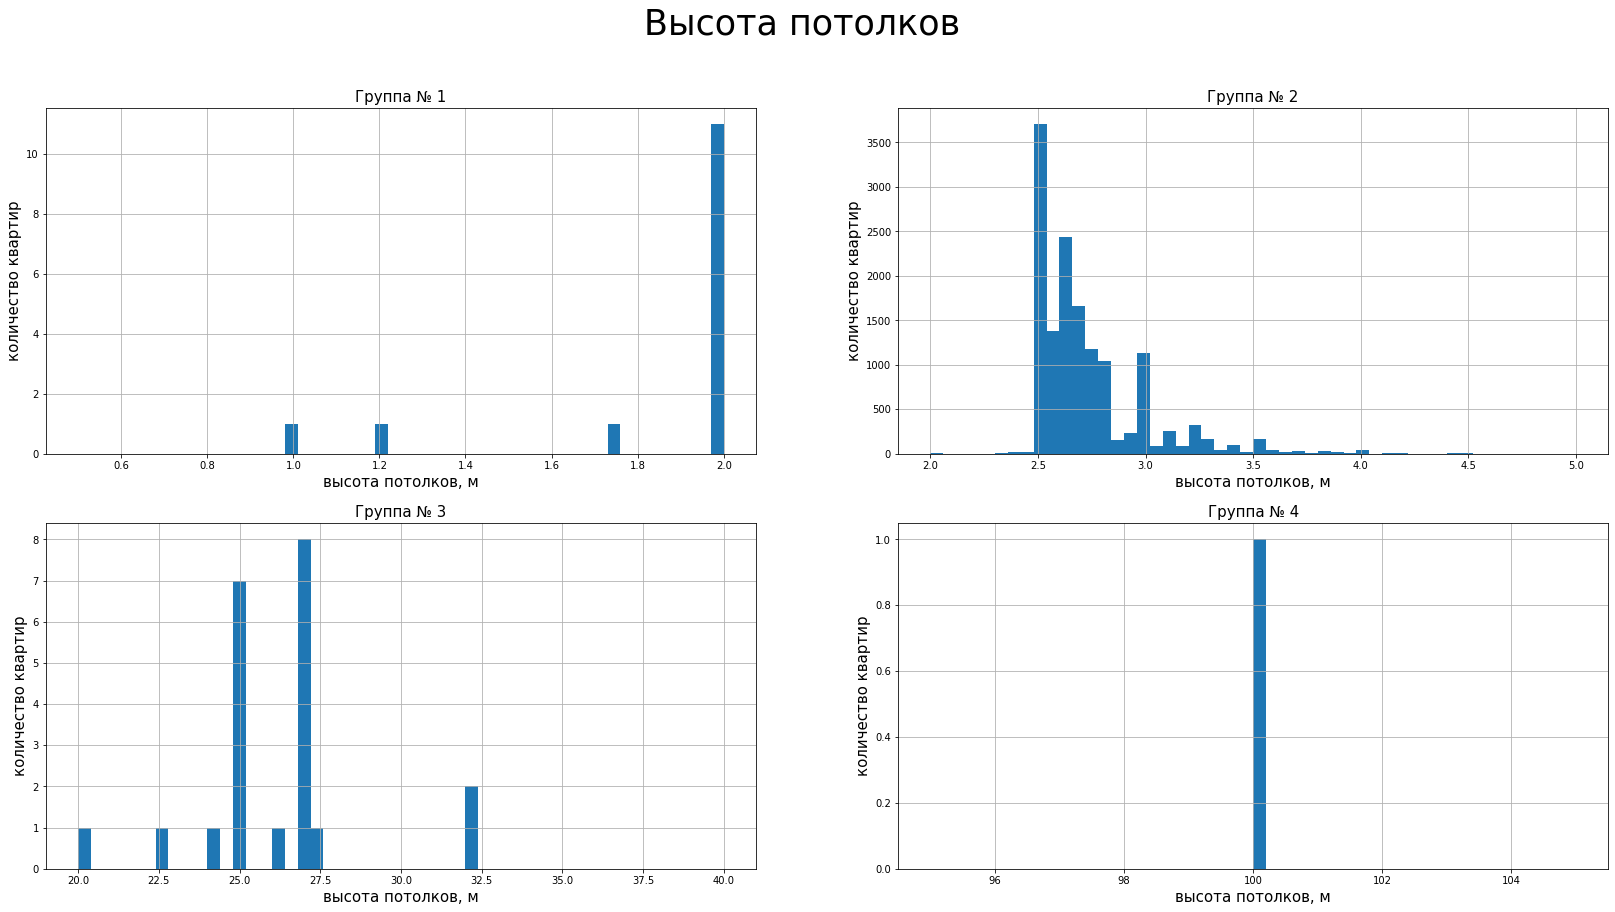

In [28]:
ax = plt.figure(figsize=(28,14))
ax.suptitle('Высота потолков', fontsize=35)


plt.subplot(2,2,1)
plt.hist(data_flats['ceiling_height'], bins=50, range=(0.5,2))
plt.grid()
plt.title('Группа № 1', fontsize=15)
plt.xlabel('высота потолков, м', fontsize=15)
plt.ylabel('количество квартир', fontsize=15)

plt.subplot(2,2,2)
plt.hist(data_flats['ceiling_height'], bins=50, range=(2,5))
plt.grid()
plt.title('Группа № 2', fontsize=15)
plt.xlabel('высота потолков, м', fontsize=15)
plt.ylabel('количество квартир', fontsize=15)

plt.subplot(2,2,3)
plt.hist(data_flats['ceiling_height'], bins=50, range=(20,40))
plt.grid()
plt.title('Группа № 3', fontsize=15)
plt.xlabel('высота потолков, м', fontsize=15)
plt.ylabel('количество квартир', fontsize=15)

plt.subplot(2,2,4)
plt.hist(data_flats['ceiling_height'], bins=50, range=(95,105))
plt.grid()
plt.title('Группа № 4', fontsize=15)
plt.xlabel('высота потолков, м', fontsize=15)
plt.ylabel('количество квартир', fontsize=15)

ax.show()

По этим гистограммам можно сделать следующие **выводы**:
1. Есть порядка 3 квартир с высотой потолков меньше 1.8 метров (группа №1) - это явно ошибка, но ее природа не поддается объяснению
2. Основная масса квартир имеет потолки от 2.5 до 3 метров (группа №2), причем гистограмма этой группы отдаленно напоминает нормальное распределение
3. Есть порядка 20 квартир с высотой потолков от 20 до 33 метров (группа №3) - можно предположить, что эта ошибка возникла при внесении в базу данных. То есть высота потолка 2.5 метра была записана как 25 метров. Т.е. эту группу данных можно привести к нормальным данным простым делением на 10.
4. Есть ровно одна квартира с высотой потолков 100 метров (группа №4). Как и в случае с первой группой, природа этого выброса не поддается объяснению.

Для заполнения пропущенных значений предположим, что высота потолков зависит от типа дома. В качестве индикатора типа дома примем количество этажей в нем. Сгруппируем данные по количеству этажей в доме, а потом найдем медианное значение высоты потолков в каждой группе.

Но перед этим проведем две операции:
1. Приведем группу №3 к нормальным значениям
2. Для группировки выберем данные без выбросов (т.е. без групп №1 и №4)

In [29]:
# функция для приведения группы №3 к нормальным значениям

def ceiling_height_group_3_correction (height):
    if 19 < height < 35:
        return height/10
    else:
        return height

In [30]:
# корректируем значения группы №3 в таблице

data_flats['ceiling_height'] = data_flats['ceiling_height'].apply(ceiling_height_group_3_correction)

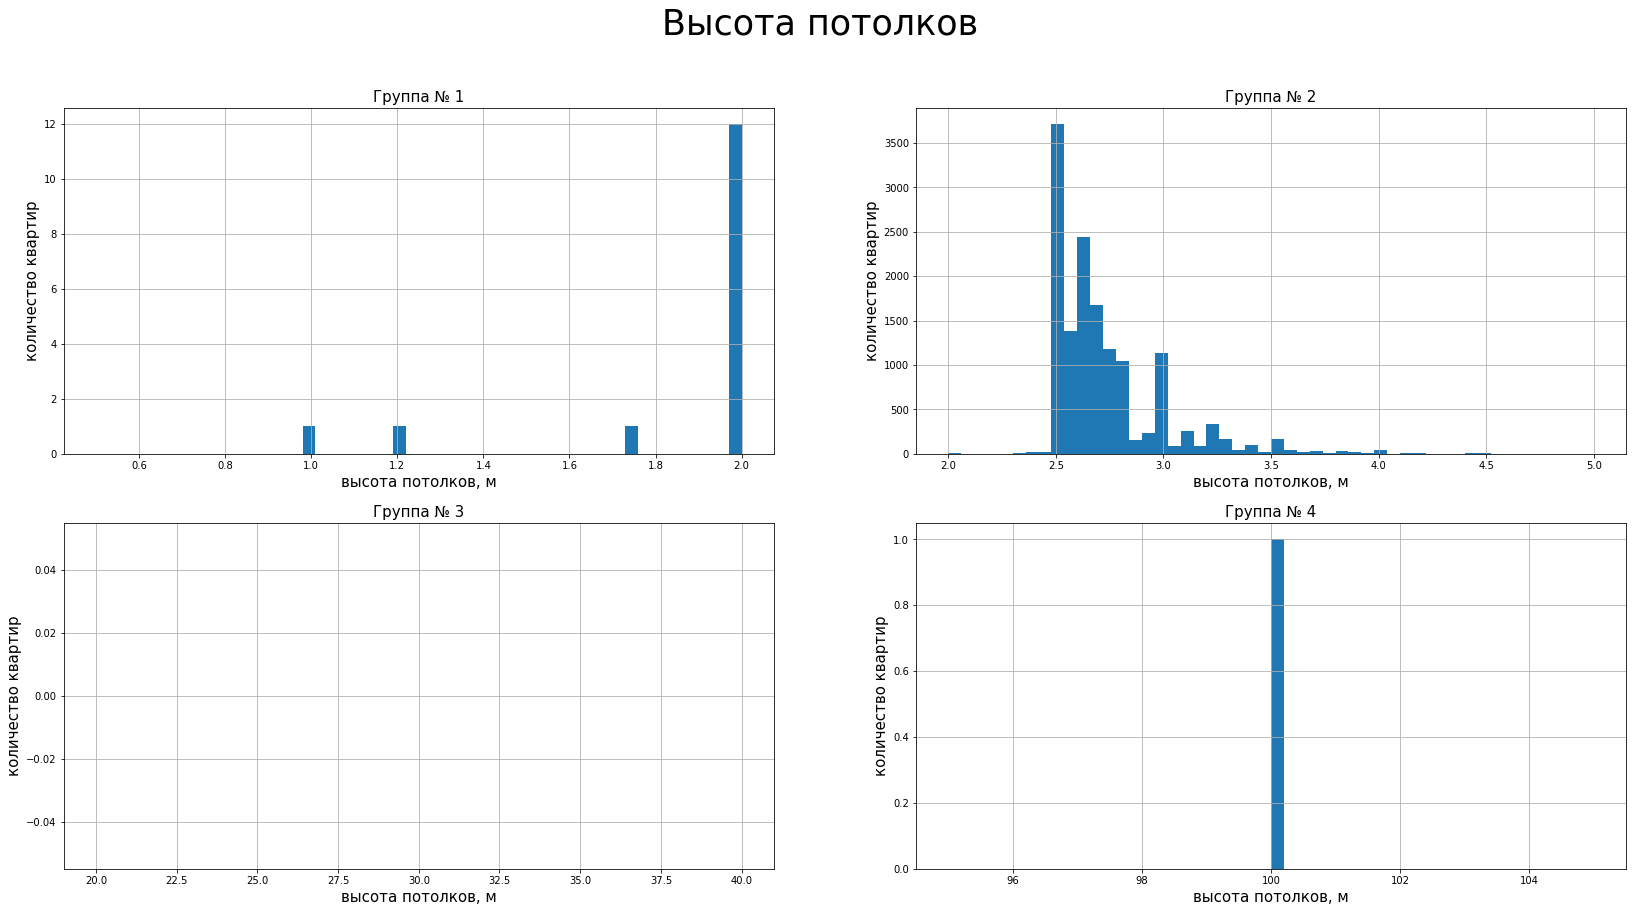

In [31]:
# еще раз строим гистограммы выделенных 4 групп, чтобы убедиться в том, что мы избавились от группы №3

ax = plt.figure(figsize=(28,14))
ax.suptitle('Высота потолков', fontsize=35)


plt.subplot(2,2,1)
plt.hist(data_flats['ceiling_height'], bins=50, range=(0.5,2))
plt.grid()
plt.title('Группа № 1', fontsize=15)
plt.xlabel('высота потолков, м', fontsize=15)
plt.ylabel('количество квартир', fontsize=15)

plt.subplot(2,2,2)
plt.hist(data_flats['ceiling_height'], bins=50, range=(2,5))
plt.grid()
plt.title('Группа № 2', fontsize=15)
plt.xlabel('высота потолков, м', fontsize=15)
plt.ylabel('количество квартир', fontsize=15)

plt.subplot(2,2,3)
plt.hist(data_flats['ceiling_height'], bins=50, range=(20,40))
plt.grid()
plt.title('Группа № 3', fontsize=15)
plt.xlabel('высота потолков, м', fontsize=15)
plt.ylabel('количество квартир', fontsize=15)

plt.subplot(2,2,4)
plt.hist(data_flats['ceiling_height'], bins=50, range=(95,105))
plt.grid()
plt.title('Группа № 4', fontsize=15)
plt.xlabel('высота потолков, м', fontsize=15)
plt.ylabel('количество квартир', fontsize=15)

ax.show()

По гистограммам видно, что группа №3 исчезла с гистограмм. При этом гистограмма группы №2 (в которую влилась группа №3) не изменилась, что, вероятно, говорит о том, что пока что мы всё делаем правильно. Теперь осталось выделить группу №2 и сгруппировать ее по количеству этажей в доме

In [32]:
# группируем медианную высоту потолков по количеству этажей

data_ceiling_groups = data_flats.query('1.8 < ceiling_height < 5').pivot_table(index = 'floors_total', 
                                                                               values = 'ceiling_height',
                                                                              aggfunc = 'median')
# переименовываем колонку для удобства обращения

data_ceiling_groups.columns = ['median_height']

# вызываем получившуюся таблицу

data_ceiling_groups

,median_height
floors_total,
1.0,2.80
2.0,2.70
3.0,2.80
4.0,3.00
5.0,2.55
6.0,3.00
7.0,3.00
8.0,2.80
9.0,2.55


In [33]:
# функция, возвращающая высоту потолка по количеству этажей

def ceiling_height_correct_fillna (floors):
    try:
        height = data_ceiling_groups['median_height'][floors]
        return height
    except KeyError:
        return np.nan

In [34]:
# применяем написанную функцию к тем строкам, где пропущена высота потолков

data_flats.loc[data_flats['ceiling_height'].isna(), 'ceiling_height'] = data_flats[data_flats['ceiling_height'].isna()]['floors_total'].apply(ceiling_height_correct_fillna)

<a id="выбросы_потолок" ></a>

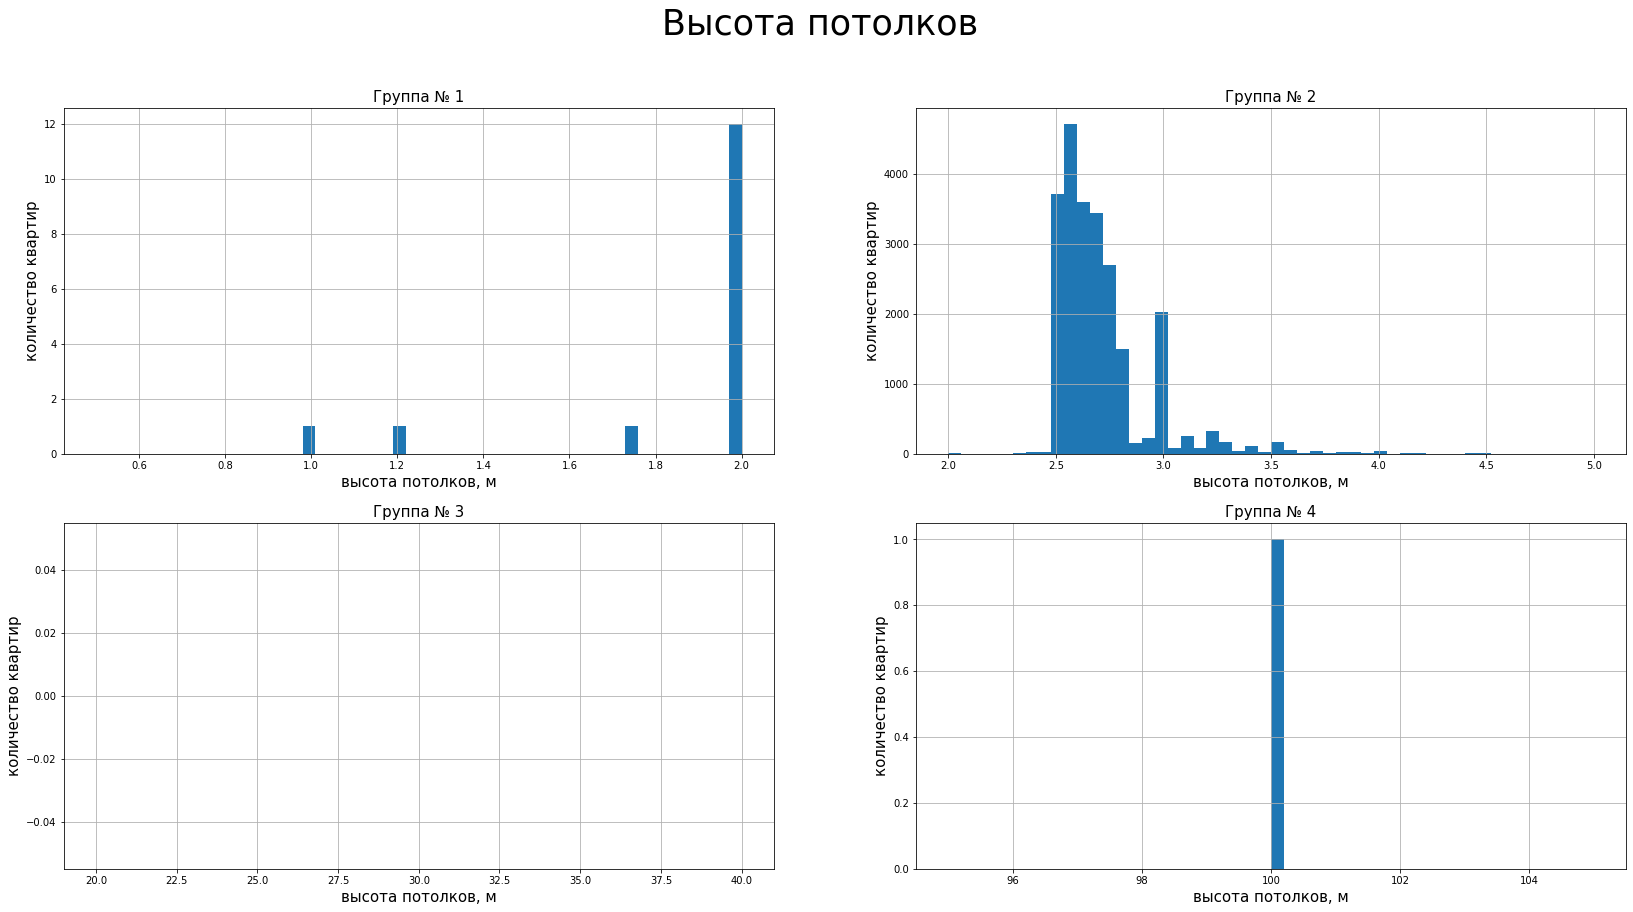

In [35]:
# еще раз строим гистограммы выделенных 4 групп, чтобы посмотреть как они изменились

ax = plt.figure(figsize=(28,14))
ax.suptitle('Высота потолков', fontsize=35)


plt.subplot(2,2,1)
plt.hist(data_flats['ceiling_height'], bins=50, range=(0.5,2))
plt.grid()
plt.title('Группа № 1', fontsize=15)
plt.xlabel('высота потолков, м', fontsize=15)
plt.ylabel('количество квартир', fontsize=15)

plt.subplot(2,2,2)
plt.hist(data_flats['ceiling_height'], bins=50, range=(2,5))
plt.grid()
plt.title('Группа № 2', fontsize=15)
plt.xlabel('высота потолков, м', fontsize=15)
plt.ylabel('количество квартир', fontsize=15)

plt.subplot(2,2,3)
plt.hist(data_flats['ceiling_height'], bins=50, range=(20,40))
plt.grid()
plt.title('Группа № 3', fontsize=15)
plt.xlabel('высота потолков, м', fontsize=15)
plt.ylabel('количество квартир', fontsize=15)

plt.subplot(2,2,4)
plt.hist(data_flats['ceiling_height'], bins=50, range=(95,105))
plt.grid()
plt.title('Группа № 4', fontsize=15)
plt.xlabel('высота потолков, м', fontsize=15)
plt.ylabel('количество квартир', fontsize=15)

ax.show()

Видно, что группы №1 и №4 никак не изменились, а группа №3 не появилась снова. В группе №2 произошли значительные изменения - значительно выросло количество квартир с высотой потолков ~2.65 метра. Тем не менее гистограмма этой группы все еще напоминает нормальное распределение (за исключением дополнительного пика на 3.0 метрах)

Проверим сколько пропусков осталось в столбце `ceiling_height`

In [36]:
# вызываем подряд методы isna() и sum() для подсчета количества пропущенных значений

print('Количество пропущенных значений =', data_flats['ceiling_height'].isna().sum())

# сразу посчитаем и процент пропущенных значений

total_nan = data_flats['ceiling_height'].isna().sum()
total_rows = data_flats.shape[0]
percent_nan = total_nan / total_rows

print('В столбце ceiling_height пропущенно {:.2%} значений'.format(percent_nan))

Количество пропущенных значений = 78
В столбце ceiling_height пропущенно 0.33% значений


Отлично, теперь **пропущенных значений практически нет**. Тем не менее стоит помнить о двух группах выбросов, продемонстрированных на [гистограммах](#выбросы_потолок)

<a id="floors_total"></a>

### Столбец `floors_total`

Содержит количество этажей в доме

In [37]:
# проверяем тип данных

data_flats['floors_total'].dtype

dtype('float64')

Не бывает нецелое количество этажей. Стоит изменить тип данных в столбце на int. Но перед этим вызовем value_counts(), чтобы проверить не прячется ли там действительно нецелое число этажей.

In [38]:
# вызываем value_counts() чтобы убедиться в отсутствии нецелых значений количества этажей в доме

data_flats['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

In [39]:
# меняем тип данных на int64

data_flats['floors_total'] = data_flats['floors_total'].astype('Int64')

In [40]:
# проверяем тип данных после работы astype

data_flats['floors_total'].dtype

Int64Dtype()

Отлично, теперь в столбце всегда целое количество этажей. Теперь можно заняться пропусками и выбросами.

In [41]:
# вызываем подряд методы isna() и sum() для подсчета количества пропущенных значений

data_flats['floors_total'].isna().sum()

86

86 пропущенных значений это достаточно мало. Посчитаем какой процент они составляют от общего количества.

In [42]:
total_nan = data_flats['floors_total'].isna().sum()
total_rows = data_flats.shape[0]
percent_nan = total_nan / total_rows

print('В столбце floors_total пропущенно {:.2%} значений'.format(percent_nan))

В столбце floors_total пропущенно 0.36% значений


построим гистограмму столбца

Text(0.5, 0, 'Количество этажей')

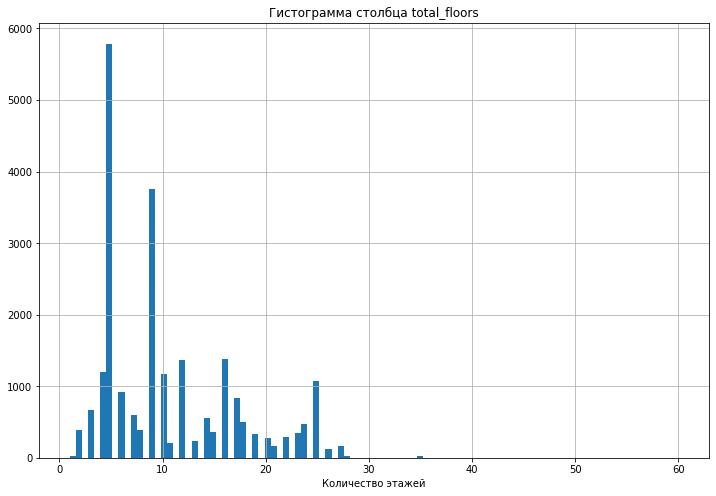

In [43]:
plt.figure(figsize=(12,8))
data_flats['floors_total'].hist(bins=100)
plt.title('Гистограмма столбца total_floors')
plt.xlabel('Количество этажей')

Меньше 0.4% пропущенных значений. Поскольку в таблице нет данных, позволяющих рассчитать этажность дома, на этапе рассчета статистики можно будет просто отбросить эти значения - такое малое количество не должно привести к серьезным искажениям.

Стоит отметить, что квартиты в домах, в которых больше 30 этажей, очень редки. То есть на этапе чистки редких значений можно их отбросить, чтобы они не мешали построению графиков и рассчету коэффициентов корреляции

<a id="living_area"></a>

### Столбец `living_area`  

Содержит жилую площадь в квадратных метрах

In [44]:
# проверяем тип данных

data_flats['living_area'].dtype

dtype('float64')

В целом площадь может быть нецелой. Хотя стоит признать, что обычно указывают целое число квадратных метров. Посмотрим количество пропущенных значений и выбросов.

In [45]:
# вызываем подряд методы isna() и sum() для подсчета количества пропущенных значений

data_flats['living_area'].isna().sum()

1903

In [46]:
# Вызываем describe() для поиска аномально больших/маленьких значений в столбце

data_flats['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Попробуем построить гистограмму по этому столбцу, чтобы оценить адекватность распределения данных

<a id="распределение_жилой"></a>

Text(0.5, 1.0, 'Гистограмма столбца living_area \n до обработки пропусков')

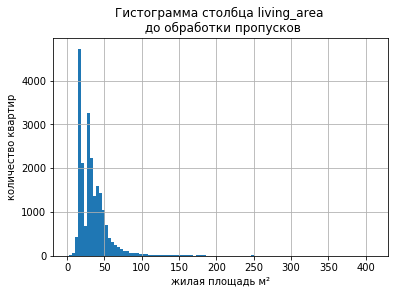

In [47]:
# строим гистограмму по столбцу living_area

data_flats['living_area'].hist(bins=100)
plt.xlabel('жилая площадь м\u00b2', fontsize=10)
plt.ylabel('количество квартир', fontsize=10)
plt.title('Гистограмма столбца living_area \n до обработки пропусков', fontsize=12)

<a id="пропуски_жилая"></a>

Для того чтобы заполнить пропуски в столбце, содержащем жилую площадь, воспользуемся тем же методом, что и для столбцов с высотой потолков - разделим данные на группы по некоторому признаку. Пропуски заполним медианным значением жилой площади для соответствующей группы.


Для того чтобы определиться по каким признакам группировать данные, посчитаем коэффициент корреляции столбца `living_area` со всеми остальными. У коэффициента корреляции есть один существенный недостаток - он чувствителен только к линейной зависимости между величинами, при  этом практически полностью игнорируя нелинейные зависимости. Но в данном случае этот недостаток становится преимуществом, т.к. прием для заполнения пропусков, который мы будем использовать, основывается именно на предположении о линейной связи двух величин

In [48]:
# пропишем класс, чтобы красиво раскрасить коэффициенты корреляции

class bcolors:
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [49]:
"""
Функция получает на вход:
    1) датафрейм, между колонками которого надо считать корреляцию
    2) имя колонки для которой надо считать корреляцию
    3) указание - надо ли возвращать словарь с корреляциями вида {название колонки: коэф. корреляции}
    
Функция в цикле проходит по всем столбцам df и считает корреляцию со столбцом column и выводит его на экран.
Если коэффициент корреляции не меньше 0.5, то красим вывод в синий цвет, для того, чтобы быстрее найти значимые факторы
Если коэффициент корреляции расчитать невозможно (из-за типа столбца), то красим вывод в красный цвет
"""



def correlation_list (df, column, return_corr_dict = False):
    col_corr = {}

    for col in df.columns:
    
        try:
            correlation = df[column].astype('float64').corr(df[col].astype('float64'))
        
            if abs(correlation) >= 0.3:
                print(bcolors.OKBLUE, end='')
            
            print('Корреляция между столбцами {} и {} = {}'.format(column, col, correlation))
            print()
        
            if abs(correlation) >= 0.3:
                print(bcolors.ENDC, end='')
            col_corr.update({col: correlation})
        except (TypeError, ValueError):
            
            print(bcolors.FAIL + 'Столбцы {} и {} - несовпадение типов'.format(column, col)  + bcolors.ENDC)
            print()
            continue
            
    if return_corr_dict == True:
        return col_corr

In [50]:
# выводим коэффициенты корреляции столбца living_area со  всеми остальными

correlation_list(data_flats, 'living_area')

Корреляция между столбцами living_area и total_images = 0.10477961438141897

Корреляция между столбцами living_area и last_price = 0.5664915336952648

Корреляция между столбцами living_area и total_area = 0.9395373338721491

Столбцы living_area и first_day_exposition - несовпадение типов

Корреляция между столбцами living_area и rooms = 0.8459774567888746

Корреляция между столбцами living_area и ceiling_height = 0.12050415236201828

Корреляция между столбцами living_area и floors_total = -0.16931142391788923

Корреляция между столбцами living_area и living_area = 1.0

Корреляция между столбцами living_area и floor = -0.09720977571194797

Корреляция между столбцами living_area и is_apartment = 0.07779975921015923

Корреляция между столбцами living_area и studio = -0.05623069334811158

Корреляция между столбцами living_area и open_plan = -0.03371103090311231

Корреляция между столбцами living_area и kitchen_area = 0.42867430668441225

Корреляция между столбцами living_area и balcony = 0

Наибольший коэффициент корреляции с жилой площадью демонстрируют общая площадь и число комнат (ну стоило ожидать в целом). Количество комнат дискретная величина и не нуждается в дополнительной категоризации. Общая площадь, напротив, величина распределенная непрерывно, поэтому ее надо дополнительно категоризовывать. Воспользуемся методом qcut(), разделив площади на 10 групп

<a id="floor"></a>

In [51]:
# создаем столбец с id группы общей площади

data_flats['total_area_id'] = pd.qcut(data_flats['total_area'], 10, labels = range(1,11), retbins = False)
data_flats.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_id
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,10
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,3
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,6
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,10


Теперь можно воспользоваться pd.pivot_table() для получения медианной жилой площади для каждой группы (количество комнат, общая площадь). А после этого заполнить пропущенные значения жилой площади в основной таблице в соответствии с их группой.

In [52]:
# сводная таблица для медианного значения жилой площади в зависимости от количества комнат и id общей площади

data_flats_living_area_pivot = pd.pivot_table(data_flats, index='rooms',
                                              columns='total_area_id',
                                              values='living_area', 
                                             aggfunc='median')

data_flats_living_area_pivot

total_area_id,1,2,3,4,5,6,7,8,9,10
rooms,,,,,,,,,,
0,18.0,23.7,24.42,29.100,NaN,NaN,33.0,59.000,NaN,60.50
1,17.0,17.0,18.00,18.600,19.8,22.0,22.7,27.635,37.9,40.80
2,21.0,23.0,27.00,28.085,30.0,31.0,33.0,36.000,40.2,47.00
3,NaN,NaN,30.00,31.000,34.2,39.0,41.9,43.700,49.1,59.50
4,NaN,NaN,NaN,NaN,37.1,39.0,45.0,49.300,56.0,74.16
5,NaN,NaN,28.60,NaN,NaN,NaN,55.1,51.200,62.0,94.80
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,124.40
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.00
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.00


In [53]:
# функция заполняющая пропуски жилой площади в основной таблице в соответствии с построенной сводной

def living_area_fillna(row):
    
    index = row['rooms']
    column = row['total_area_id']
    
    if isnan(row['living_area']):
        return data_flats_living_area_pivot[column][index]
    else:
        return row['living_area']

In [54]:
# заполняем пропуски в основной таблице

data_flats['living_area'] = data_flats.apply(living_area_fillna, axis=1)

# посчитаем количество пропусков после работы функции

data_flats['living_area'].isna().sum()

2

Два пропущенных значения всё же остались. Проверим, почему они не заполнились

In [55]:
data_flats[data_flats['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_id
13034,11,2350000.0,42.0,2018-03-25,4,2.5,5,NaN,2,NaN,False,False,NaN,NaN,деревня Старая,NaN,NaN,NaN,NaN,NaN,NaN,44.0,3
20102,11,2350000.0,42.0,2018-02-15,4,2.6,5,NaN,2,NaN,False,False,NaN,NaN,деревня Колтуши,NaN,NaN,NaN,NaN,NaN,NaN,45.0,3


Все просто - только эти две строчки имеют 4 комнаты и total_area_id равный 3. Тем не менее, 2 пропущенных значения никак не повлияют на статистику. Осталось только снова построить гистограмму столбца `living_area` чтобы убедиться в том, что ее форма не изменилась.

Text(0.5, 1.0, 'Гистограмма столбца living_area \n после обработки пропусков')

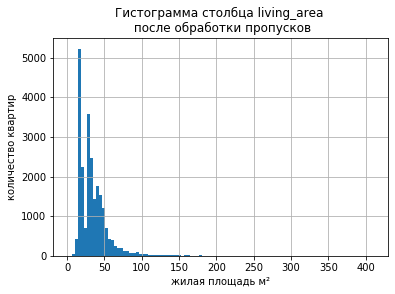

In [56]:
# строим гистограмму по столбцу living_area

data_flats['living_area'].hist(bins=100)
plt.xlabel('жилая площадь м\u00b2', fontsize=10)
plt.ylabel('количество квартир', fontsize=10)
plt.title('Гистограмма столбца living_area \n после обработки пропусков', fontsize=12)

Количество и форма пиков практически не изменились - только амплитуда пиков увеличилась. Значит наша обработка пропусков не внесла значительных изменений в закон распределения

### Столбец `floor`  

Содержит этаж

In [57]:
# проверяем тип данных

data_flats['floor'].dtype

dtype('int64')

Целочисленный тип, значит ничего не меняем. Проверим на наличие пропусков и выбросов.

In [58]:
# вызываем подряд методы isna() и sum() для подсчета количества пропущенных значений

data_flats['floor'].isna().sum()

0

In [59]:
# вызываем describe() для поиска аномально больших/маленьких значений в столбце

data_flats['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

**Пропущенных значений нет**. Выбросов, судя по describe, тоже нет.

<a id="is_apartment"></a>

### Столбец `is_apartment` 

Содержит информацию о том, что квартира является апартаментами (булев тип)

In [60]:
# проверяем тип данных

data_flats['is_apartment'].dtype

dtype('O')

Тип object - странно, должен быть bool. Вызовем value_counts(), чтобы посмотреть какие есть значения

In [61]:
# вызываем value_counts, чтобы понять какие значения содержит столбец is_apartment

data_flats['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Несмотря на то, что столбец содержит только два значения - `True` и `False`, при этом присутствует много пропусков (просто сложив количество `True` и `False` получаем 2775), поэтому тип не булев. Так как этот столбец, скорее всего, заполнялся пользователем, то пустое значение, вероятно, означает, что пользователь живет не в апартаментах. Исходя их этой логики, заполним пропущенные значением `False`.

In [62]:
# заполняем пропуски в столбце is_apartment значением False

data_flats['is_apartment'].fillna(False, inplace=True)

In [63]:
# снова проверяем тип данных

data_flats['is_apartment'].dtype

dtype('bool')

Отлично, столбец получил булев тип. Значит и **пропущенных значений нет**.

<a id="studio"></a>

### Столбец `studio` 

Содержит информацию о том, что квартира является студией (булев тип)

In [64]:
# проверяем тип данных

data_flats['studio'].dtype

dtype('bool')

Все правильно - столбец булев. Понятно, что **пропущенных значений нет**.

<a id="open_plan"></a>

### Столбец `open_plan`

Содержит информацию о том, что квартира имеет свободную планировку (булев тип)

In [65]:
# проверяем тип данных

data_flats['open_plan'].dtype

dtype('bool')

Все правильно - столбец булев. Понятно, что **пропущенных значений нет**.

<a id="kitchen_area"></a>

### Столбец `kitchen_area`

Содержит площадь кухни в квадратных метрах (м²)

In [66]:
# проверяем тип данных

data_flats['kitchen_area'].dtype

dtype('float64')

Аналогично [living_area](#living_area) площадь может быть нецелой. Далее проверим наличие пропущенных значений и выбросов

In [67]:
# вызываем подряд методы isna() и sum() для подсчета количества пропущенных значений

data_flats['kitchen_area'].isna().sum()

2278

In [68]:
# Вызываем describe() для поиска аномально больших/маленьких значений в столбце

data_flats['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Так же, как и в случае `living_area` есть около 2 тысяч пропущенных значений. При этом есть и выбросы, например, максимальная площадь кухни 112 квадратных метров, а минимальная - 1.3.

Снова попробуем построить гистограмму по этому столбцу, чтобы оценить адекватность распределения данных

Text(0.5, 1.0, 'Гистограмма столбца kitchen_area \n до обработки пропусков')

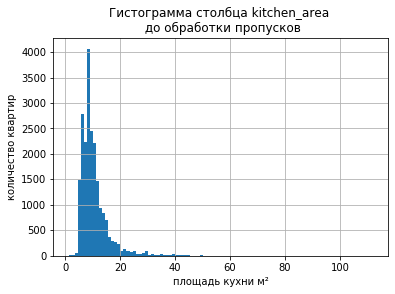

In [69]:
# строим гистограмму по столбцу kitchen_area

data_flats['kitchen_area'].hist(bins=100)
plt.xlabel('площадь кухни м\u00b2', fontsize=10)
plt.ylabel('количество квартир', fontsize=10)
plt.title('Гистограмма столбца kitchen_area \n до обработки пропусков', fontsize=12)

Применим способ обработки пропусков, которым ранее [воспользовались для столбца `living_area`](#пропуски_жилая), а именно:

1. Найдем с какими столбцами наиболее коррелирует `kitchen_area`
2. Категоризируем данные с помощью этих столбцов и для каждой получившейся группы найдем медианную площадь кухни
3. Заполним пропуски в соответствии с категориями

<a id="balcony"></a>

In [70]:
# вызываем функцию, считающую коэффициенты корреляции

correlation_list(data_flats, 'kitchen_area')

Корреляция между столбцами kitchen_area и total_images = 0.10475596512035372

Корреляция между столбцами kitchen_area и last_price = 0.5198690130216387

Корреляция между столбцами kitchen_area и total_area = 0.6091211711198314

Столбцы kitchen_area и first_day_exposition - несовпадение типов

Корреляция между столбцами kitchen_area и rooms = 0.26994485416385783

Корреляция между столбцами kitchen_area и ceiling_height = 0.11931713422154265

Корреляция между столбцами kitchen_area и floors_total = 0.16394391633708422

Корреляция между столбцами kitchen_area и living_area = 0.42829714669754826

Корреляция между столбцами kitchen_area и floor = 0.13553136960431283

Корреляция между столбцами kitchen_area и is_apartment = 0.049033849527697654

Корреляция между столбцами kitchen_area и studio = nan

Корреляция между столбцами kitchen_area и open_plan = nan

Корреляция между столбцами kitchen_area и kitchen_area = 1.0

Корреляция между столбцами kitchen_area и balcony = 0.0986338853833985

С

Воспользуемся для категоризации столбцом `total_area`. Не будем использовать столбцы `last_price` и `living_area` т.к.:
1. Одной из целей данного проекта является определение характеристик, наиболее сильно влияющих на цену квартиры. Таким образом, воспользовавшись для заполнения пропусков столбцом `last_price` мы искусственно увеличим корреляцию между ними


2. Столбец `living_area` сам по себе содержал пропуски, которые были обработаны. Если при обработке этого столбца была допущенна ошибка, то она начнет влиять и на столбец `kitchen_area`

При этом стоит отметиться, что корреляция столбца `kitchen_area` и `total_area` не очень сильна. Т.е. можно предположить, что кухни в квартирах чаще всего делают типовыми. Т.е. распределение их площадей не совсем непрерывно

Мы еще не успели удалить столбец `total_area_id`. Отлично, можно сразу делать сводную таблицу.

In [71]:
data_flats_kitchen_area_pivot = pd.pivot_table(data_flats, index='total_area_id',
                                              values='kitchen_area', 
                                             aggfunc='median')

data_flats_kitchen_area_pivot

,kitchen_area
total_area_id,
1,6.24
2,9.00
3,10.00
4,7.00
5,8.00
6,8.50
7,9.20
8,10.00
9,12.00


In [72]:
# функция заполняющая пропуски кухонной площади в основной таблице в соответствии с построенной сводной

def kitchen_area_fillna(row):
    
    index = row['total_area_id']
    
    if isnan(row['kitchen_area']):
        return data_flats_kitchen_area_pivot['kitchen_area'][index]
    else:
        return row['living_area']

In [73]:
# заполняем пропуски в основной таблице

data_flats['kitchen_area'] = data_flats.apply(kitchen_area_fillna, axis=1)

# посчитаем количество пропусков после работы функции

data_flats['kitchen_area'].isna().sum()

0

Отлично, пропусков вообще не осталось. Снова построим гистограмму, чтобы убедиться что она не изменила форму

Text(0.5, 1.0, 'Гистограмма столбца kitchen_area \n после обработки пропусков')

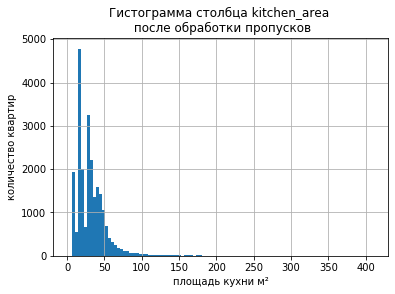

In [74]:
# строим гистограмму столбца kitchen_area после обработки пропусков

data_flats['kitchen_area'].hist(bins=100)
plt.xlabel('площадь кухни м\u00b2', fontsize=10)
plt.ylabel('количество квартир', fontsize=10)
plt.title('Гистограмма столбца kitchen_area \n после обработки пропусков', fontsize=12)

Форма распределения не изменилась - все еще похоже на нормальное распределение. А вот количество пиков явно возросло. Т.е., вероятнее всего, наше предполжение о типовых кухнях является верным.

### Столбец `balcony`

Cодержит число балконов

In [75]:
# проверяем тип данных

data_flats['balcony'].dtype

dtype('float64')

Не бывает нецелое число балконов. Вызовем value_counts() для того, чтобы проверить нет ли в столбце действительно нецелых значений

In [76]:
data_flats['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Видимо, нецелым типом столбец обязан значениям NaN. Снова поменяем тип с помощью astype()

In [77]:
# меняем тип данных на int64

data_flats['balcony'] = data_flats['balcony'].astype('Int64')

In [78]:
# проверяем тип данных после работы astype

data_flats['balcony'].dtype

Int64Dtype()

Поменяли тип на целочисленный. Пора заняться пропусками и выбросами.

In [79]:
# вызываем подряд методы isna() и sum() для подсчета количества пропущенных значений

data_flats['balcony'].isna().sum()

11519

Пропуски заменим нулями. Исходя из логики, изложенной в описании проекта - отсутствие значение, вероятнее всего, означает отсутствие балкона

In [80]:
data_flats['balcony'].fillna(0, inplace=True)

In [81]:
# вызываем подряд методы isna() и sum() для подсчета количества пропущенных значений после работы fillna

data_flats['balcony'].isna().sum()

0

Тип изменили, **пропущенных значений нет**

<a id="locality_name"></a>

### Столбец `locality_name`

Содержит название населённого пункта

In [82]:
# проверяем тип данных

data_flats['locality_name'].dtype

dtype('O')

Тип object - все правильно. Проверим количество пропущенных значений

In [83]:
# вызываем подряд методы isna() и sum() для подсчета количества пропущенных значений

data_flats['locality_name'].isna().sum()

49

Незначительное количество значений. Да и заполнить их нечем, потому что название населенного пункта можем только угадать. Вот если бы в таблице было бы название ближайшего аэропорта - можно было бы сгруппировать по нему и попытаться заполнить пропуски в населеном пункте. Но прежде чем перейти к следующим столбцам - переведем весь этот столбец в нижний регистр.

In [84]:
# приводим весь столбец к нижнему регистру с помощью str.lower()

data_flats['locality_name'] = data_flats['locality_name'].str.lower()

# выводим первые 5 строк, чтобы проверить, что метод сработал

data_flats['locality_name'].head()

0    санкт-петербург
1     посёлок шушары
2    санкт-петербург
3    санкт-петербург
4    санкт-петербург
Name: locality_name, dtype: object

**Незначительное количество пропущенных значений (всего 49)**. Столбец приведен к нижнему регистру, для удобства обработки

<a id="airports_nearest"></a>

### Столбец `airports_nearest`

Содержит расстояние до ближайшего аэропорта в метрах (м)

In [85]:
# проверяем тип данных

data_flats['airports_nearest'].dtype

dtype('float64')

Все хорошо, расстояние в метрах может быть нецелым. Посмотрим количество пропущенных значений и проверим наличие выбросов

In [86]:
# вызываем подряд методы isna() и sum() для подсчета количества пропущенных значений

data_flats['airports_nearest'].isna().sum()

5542

In [87]:
# Вызываем describe() для поиска аномально больших/маленьких значений в столбце

data_flats['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

5,5 тысяч пропущенных значений - это достаточно много. Но только заменить мы их можем только средним или медианой, а рассчитать не получится. Так как нас в целом эта характеристика не интересует в рамках данного проекта, то и трогать ее не будем. Но стоит отметить, что **минимальное значение - 0 метров**. Либо кто-то живет прямо у стойки регистрации, либо ошибка в данных - скорее всего, второй вариант. Это стоит выделить.

<a id="cityCenters_nearest"></a>

### Столбец `cityCenters_nearest`

Содержит расстояние до центра города (м)

In [88]:
# проверяем тип данных

data_flats['cityCenters_nearest'].dtype

dtype('float64')

Тип данных правильный. Проверим количество пропусков и выбросов.

In [89]:
# вызываем подряд методы isna() и sum() для подсчета количества пропущенных значений

data_flats['cityCenters_nearest'].isna().sum()

5519

In [90]:
# Вызываем describe() для поиска аномально больших/маленьких значений в столбце

data_flats['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Снова 5.5 тысяч пропущенных значений. **Попробуем оставить пропуски пропусками**, руководствуясь следующей логикой: далее по ходу проекта нам необходимо будет построить зависимость цены квартиры от расстояния до центра. По резкому изменению цены необходимо будет определить центральную зону. Так как в данном случае мы можем заполнить пропуски только медианой или средним, то, скорее всего, (ввиду значительного количества пропущенных значений) такое заполнение приведет к серьезному сдвигу значения радиуса центральной зоны. С другой стороны в таблице остается около 18 тысяч строк с заполненным значением `cityCenters_nearest`, что является достаточным количеством для нахождения центральной зоны.


Причина появления пропусков может иметь две природы:
1. Если значение заполнялось пользователем, то он, вероятно, не умел пользоваться геокодером, поэтому не смог заполнить значение
2. Если значение заполнялось автоматически, то, скорее всего, из-за неправильно записанного адреса (например опечатка в названии улицы) геокодер не смог рассчитать расстояние

<a id="parks_around3000"></a>

### Столбец `parks_around3000`

Содержит число парков в радиусе 3 км

In [91]:
# проверяем тип данных

data_flats['parks_around3000'].dtype

dtype('float64')

Надо изменить тип данных на целочисленный, т.к. не может быть 3.5 парка. Но для начала снова вызовем value_counts() чтобы убедиться, что дробных значений действительно нет

In [92]:
data_flats['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

Нецелым типом столбец снова обязан наличию NaN'ов. Воспользуемся astype() для смены типа.

In [93]:
# меняем тип на целочисленный

data_flats['parks_around3000'] = data_flats['parks_around3000'].astype('Int64')

In [94]:
# проверяем тип данных после работы astype()

data_flats['parks_around3000'].dtype

Int64Dtype()

Тип поменяли. Эта характеристика, вообще говоря, не интерсует нас в рамках данного проекта, поэтому и количество пропущенных значений в этом столбце нам не интересует.

<a id="parks_nearest"></a>

### Столбец `parks_nearest`

Содержит расстояние до ближайшего парка (м)

In [95]:
# проверяем тип данных

data_flats['parks_nearest'].dtype

dtype('float64')

Расстояние до парка в метрах вполне может быть нецелым. Опять же, в рамках данного проекта нас эта характеристика не интересует, поэтому даже не будем считать количество пропусков.

<a id="ponds_around3000"></a>

### Столбец `ponds_around3000`

Содержит число водоёмов в радиусе 3 км

In [96]:
# проверяем тип данных

data_flats['ponds_around3000'].dtype

dtype('float64')

Тут всё точь-в-точь как со столбцом [parks_around3000](#parks_around3000) - меняем тип на целочисленный и не волнуемся по поводу пропусков

In [97]:
# меняем тип на целочисленный

data_flats['ponds_around3000'] = data_flats['ponds_around3000'].astype('Int64')

In [98]:
# проверяем тип данных после работы astype()

data_flats['ponds_around3000'].dtype

Int64Dtype()

<a id="ponds_nearest"></a>

### Столбец `ponds_nearest`

Содержит расстояние до ближайшего водоёма (м)

In [99]:
# проверяем тип данных

data_flats['ponds_nearest'].dtype

dtype('float64')

Точно так же как и в случае [parks_nearest](#parks_nearest) - ничего не делаем

<a id="days_exposition"></a>

### Столбец `days_exposition`

Содержит сколько дней было размещено объявление (от публикации до снятия)

In [100]:
# проверяем тип данных

data_flats['days_exposition'].dtype

dtype('float64')

Судя по описанию, тип всё таки должен быть целочисленным, так как целое число дней от публикации до снятия. Округляем до целого с помощью round(), а потом снова воспользцуемся astype()

In [101]:
# округляем число дней до целого, а потом приводим к целочисленному типу

data_flats['days_exposition'] = data_flats['days_exposition'].round(0).astype('Int64')

In [102]:
# снова проверяем тип данных

data_flats['days_exposition'].dtype

Int64Dtype()

In [103]:
# вызываем подряд методы isna() и sum() для подсчета количества пропущенных значений

data_flats['days_exposition'].isna().sum()

3181

In [104]:
# Вызываем describe() для поиска аномально больших/маленьких значений в столбце

data_flats['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0.5, 1.0, 'Гистограмма столбца days_exposition')

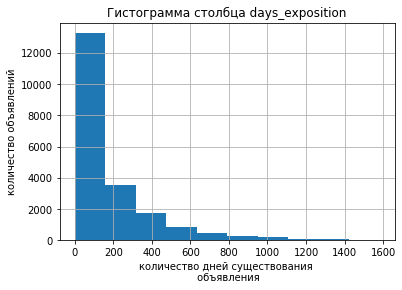

In [105]:
# Вызываем hist() чтобы оценить распределение данной характеристики

data_flats['days_exposition'].hist()
plt.xlabel('количество дней существования \n объявления', fontsize=10)
plt.ylabel('количество объявлений', fontsize=10)
plt.title('Гистограмма столбца days_exposition', fontsize=12)

Пропущенные значения оставим незаполненными, так как их недостаточно много, чтобы помешать рассчету статистики. При это адекватного способа заполнения пропусков, который не ухудшил бы распределние этой величины нет. Величина распределена нормально.

### Перевод всех int64 в Int64

Чтобы все целочисленные столбцы имели один тип, преобразуем все int64 к Int64

In [106]:
# Вызываем info() чтобы определить какие столбцы подлежат преобразованию

data_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23621 non-null float64
floors_total            23613 non-null Int64
living_area             23697 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null Int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null Int64
parks_nearest           8079 non-null float64
ponds_around30

In [107]:
# меняем тип трех столбцов

data_flats['total_images'] = data_flats['total_images'].astype('Int64')
data_flats['rooms'] = data_flats['rooms'].astype('Int64')
data_flats['floor'] = data_flats['floor'].astype('Int64')

In [108]:
# Вызываем info() чтобы убедиться в том, что все целочисленные столбцы теперь имеют тип Int64

data_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null Int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null Int64
ceiling_height          23621 non-null float64
floors_total            23613 non-null Int64
living_area             23697 non-null float64
floor                   23699 non-null Int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null Int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null Int64
parks_nearest           8079 non-null float64
ponds_around30

### Промежуточный вывод 2

Напишем вывод следующим образом:
1. Имя столбца
    - как обработаны пропуски
    - причина возникновения пропусков
    - какие выбросы обнаружены в столбце
    - менялся ли тип

1. `total_images` — число фотографий квартиры в объявлении
    - пропущенных значений нет
    - среднее практически на 1 больше медианы
    - тип данных изменен на Int64
    
    
2. `last_price` — цена на момент снятия с публикации
    - пропущенных значений нет
    - минимальное значение всего 12190
    
    
3. `total_area` — площадь квартиры в квадратных метрах (м²)
    - пропущенных значений нет
    - стоит обратить внимание на квартиру с площадью 12 квадратов - если это однушка, то все нормально, если комнат больше, то скорее всего ошибка при внесении данных в базу
    
    
4. `first_day_exposition` — дата публикации
    - пропущенных значений нет
    - выбросов нет
    - тип данных изменен на datetime
    
    
5. `rooms` — число комнат
    - пропущенных значений нет
    - стоит далее обратить внимание на квартиры с 0 комнат (следуя логике это возможно только в квартирах студиях), а также интересно подробнее взглянуть на квартиру с 19 комнатами
    - тип данных изменен на Int64
    
6. `ceiling_height` — высота потолков (м)
    - пропущенные значения были заполненны медианными значениями, полученными в результате группировки данных по количеству этаэей в доме (после заполнения осталось всего 0.33% пропущенных значений)
    - данные скорее всего заполнялись пользователем, соответственно пропуск скорее всего означает, что пользователь не знает точную высоту потолков и предпочел оставить значение пустым
    - было три группы выбросов
    
        1. потолки меньше 2.0 метров
        2. потолки от 20 до 35 метров
        3. потолки 100 метров
        
        *группа B была приведена к нормальным данным путем деления значений на 10, так как ошибка скорее всего возникла при опечатке пользователя (2.5 метра были записаны как 25). Группы A и C остались без измененений (заполнение пропусков производилось после обработки группы B и бех учета групп A и C)*
        
      
7. `floors_total` — всего этажей в доме
    - меньше 0.4% пропущенных значений - пропуски не заполнялись
    - тип данных изменен на Int64
    - скорее всего, столбец заполнялся автоматически. Пропуск, вероятно, означает ошибку при заполнении данных (например ошибку обращения к базе данных)
    
    
8. `living_area` — жилая площадь в квадратных метрах(м²)
    - пропуски остались незаполненными, так как есть достаточно количество значений, для рассчета статистики. При этом заполненные значения распределены практически нормально
    - столбец, скорее всего, заполнялся пользователем. Вероятно, пропуск означает то, что пользователь не знал точного числа и решил оставить значение незаполненным
    - в столбце есть как аномально маленькие, так и аномально большие значения
    
    
9. `floor` — этаж
    - пропущенных значений нет
    - тип данных изменен на Int64
    

10. `is_apartment` — апартаменты (булев тип)
    - пропущенные значения заменены на `False`
    - столбец, скорее всего, заполнялся пользователем, то пустое значение, вероятно, означает, что пользователь живет не в апартаментах
    - тип данных изменен на bool
    
    
11. `studio` — квартира-студия (булев тип)
    - пропущенных значений нет
    
    
12. `open_plan` — свободная планировка (булев тип)
    - пропущенных значений нет
    

13. `kitchen_area` — площадь кухни в квадратных метрах (м²)
    - пропуски остались незаполненными, так как есть достаточно количество значений, для рассчета статистики. При этом заполненные значения распределены нормально
    - столбец, скорее всего, заполнялся пользователем. Вероятно, пропуск означает то, что пользователь не знал точного числа и решил оставить значение незаполненным
    - в столбце есть как аномально маленькие, так и аномально большие значения
    
14. `balcony` — число балконов
    - пропуски заменили нулями
    - столбец, скорее всего, заполняется пользователем. Поэтому отсутствие значения, вероятно, означает отсутствие балкона
    - тип данных изменен на Int64


15. `locality_name` — название населённого пункта
    - незначительное количество пропущенных значений (всего 49)
    - столбец приведен к нижнему регистру, для удобства обработки
    
    
16. `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
    - пропуски остались незаполненными, так как эта характеристика не интересует нас в рамках данного проекта
    - стоит отметить, что минимальное значение - 0 метров. Либо кто-то живет прямо у стойки регистрации, либо ошибка в данных - скорее всего, второй вариант. Это стоит выделить.
    
    
17. `cityCenters_nearest` — расстояние до центра города (м)
    - Пропуски остались незаполненными, руководствуясь следующей логикой: далее по ходу проекта нам необходимо будет построить зависимость цены квартиры от расстояния до центра. По резкому изменению цены необходимо будет определить центральную зону. Так как в данном случае мы можем заполнить пропуски только медианой или средним, то, скорее всего, (ввиду значительного количества пропущенных значений) такое заполнение приведет к серьезному сдвигу значения радиуса центральной зоны. С другой стороны в таблице остается около 18 тысяч строк с заполненным значением `cityCenters_nearest`, что является достаточным количеством для нахождения центральной зоны.
    - Причина появления пропусков может иметь две природы:
        1. Если значение заполнялось пользователем, то он, вероятно, не умел пользоваться геокодером, поэтому не смог заполнить значение
        2. Если значение заполнялось автоматически, то, скорее всего, из-за неправильно записанного адреса (например опечатка в названии улицы) геокодер не смог рассчитать расстояние


18. `parks_around3000` — число парков в радиусе 3 км
    - пропуски остались незаполненными, так как эта характеристика не интересует нас в рамках данного проекта
    - тип данных изменен на Int64
    
  
19. `parks_nearest` — расстояние до ближайшего парка (м)
    - пропуски остались незаполненными, так как эта характеристика не интересует нас в рамках данного проекта
    
    
20. `ponds_around3000` — число водоёмов в радиусе 3 км
    - пропуски остались незаполненными, так как эта характеристика не интересует нас в рамках данного проекта
    - тип данных изменен на Int64
    
    
21. `ponds_nearest` — расстояние до ближайшего водоёма (м)
    - пропуски остались незаполненными, так как эта характеристика не интересует нас в рамках данного проекта
    
 
22. `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
    - пропущенные значения оставили незаполненными, так как их недостаточно много, чтобы помешать рассчету статистики. При этом адекватного способа заполнения пропусков, который не ухудшил бы распределние этой величины нет. Величина распределена нормально
    - присутствуют аномально малые значения

## Шаг 3. Посчитайте и добавьте в таблицу

### Цена квадратного метра

In [109]:
# для нахождения цены квадратного метра делим last_price на total_area

data_flats['price_per_square_meter'] = data_flats['last_price'] / data_flats['total_area']

# вызываем describe для полученного столбца

data_flats['price_per_square_meter'].describe().apply(lambda x: format(x, 'f'))

count      23699.000000
mean       99421.656395
std        50306.801844
min          111.834862
25%        76585.470151
50%        95000.000000
75%       114256.326462
max      1907500.000000
Name: price_per_square_meter, dtype: object

In [110]:
# проверим тип столбца, должен быть float

data_flats['price_per_square_meter'].dtype

dtype('float64')

Видно, что есть как аномально маленькие, так и аномально большие значения. Построим гистограмму по этому столбцу

Text(0, 0.5, 'количество объявлений')

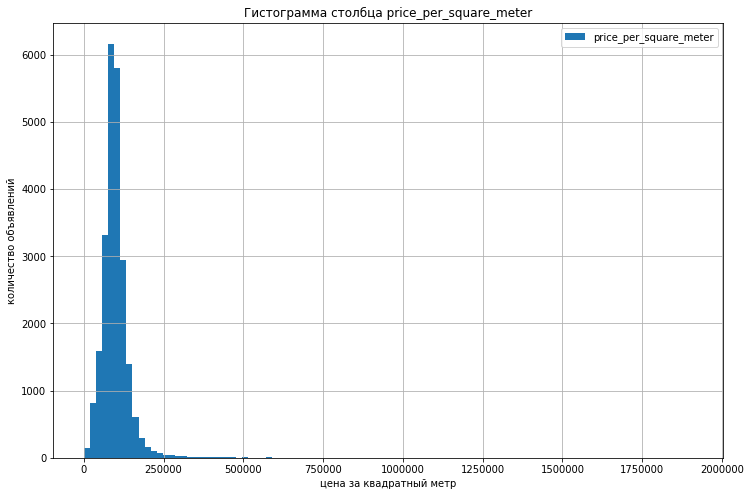

In [111]:
data_flats.plot(y='price_per_square_meter', kind='hist', 
                bins=100,
                grid=True, figsize=(12,8))
plt.title('Гистограмма столбца price_per_square_meter')
plt.xlabel('цена за квадратный метр')
plt.ylabel('количество объявлений')

Видно, что распределение очень похоже на нормальное - это хорошо. Значения после 750 000 практически не встречаются. Построим гистограмму, отбросив этот хвост.

Text(0, 0.5, 'количество объявлений')

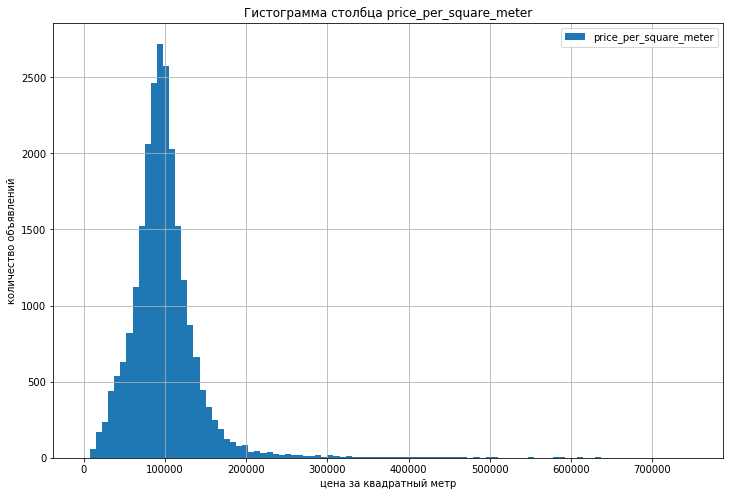

In [112]:
# строим гистограмму price_per_square_meter без хвоста

data_flats.plot(y='price_per_square_meter', kind='hist',
                bins=100, range=(0, 750000),
                grid=True, figsize=(12,8))
plt.title('Гистограмма столбца price_per_square_meter')
plt.xlabel('цена за квадратный метр')
plt.ylabel('количество объявлений')

Наблюдаем практически эталонное нормальное распределение. Можно было бы гордиться тем, что предобработка проведена верно, но только мы ничего не меняли в столбцах `last_price` и `total_area`

### День недели, месяц и год публикации объявления

In [113]:
# методами dt.*() добавляем столбцы с днем недели, месяцем и годом публикации

data_flats['weekday_exposition'] = data_flats['first_day_exposition'].dt.weekday
data_flats['month_exposition'] = data_flats['first_day_exposition'].dt.month
data_flats['year_exposition'] = data_flats['first_day_exposition'].dt.year

Чтобы оценить какие дни недели/месяцы/годы являются более популярными, сгруппируем столбцы `weekday_exposition`,`month_exposition`,`year_exposition` и построим их столбчатые диаграммы

Text(0.5, 0, 'год')

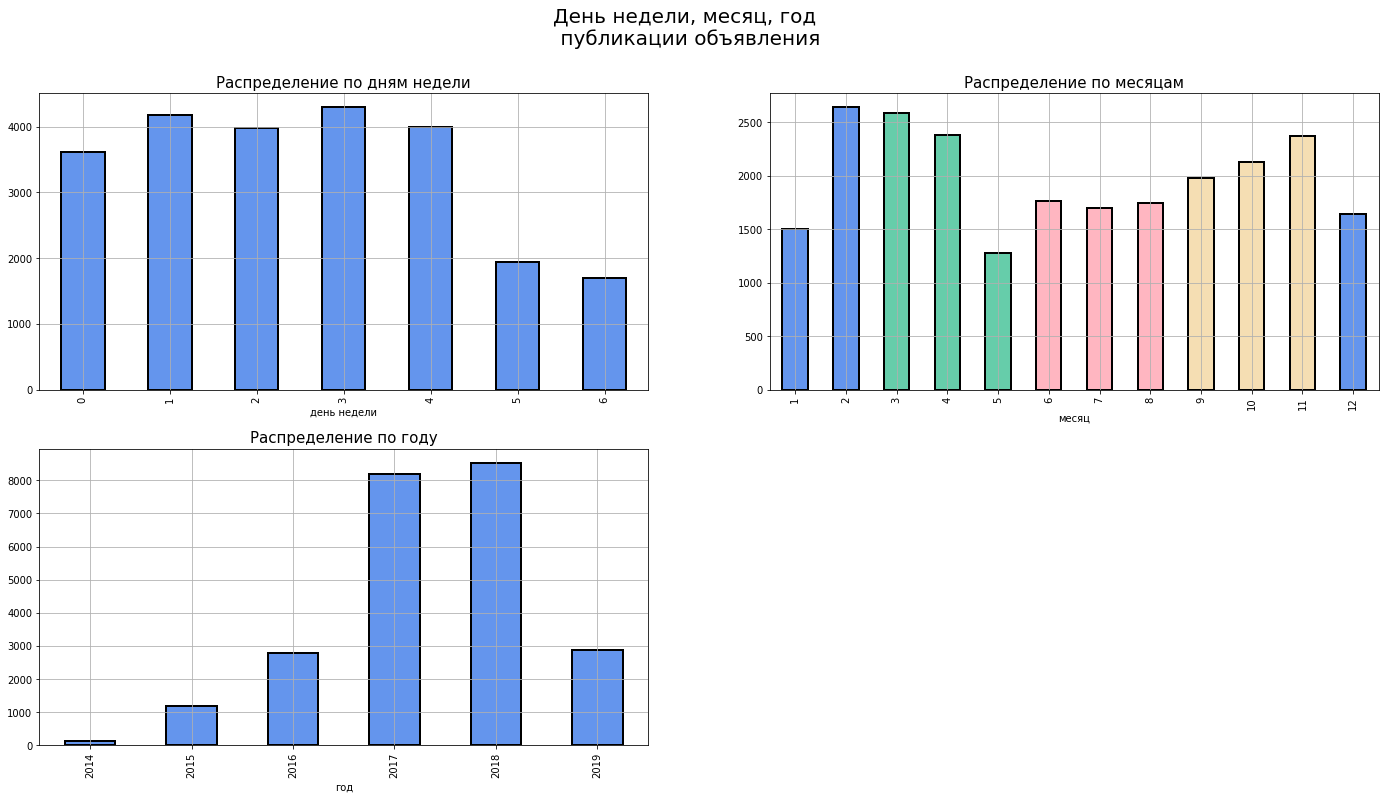

In [114]:
# группируем и строим столбчатые диаграммы

ax=plt.figure(figsize=(24,12))
ax.suptitle('День недели, месяц, год \n публикации объявления', fontsize=20)

plt.subplot(2,2,1)
data_flats.groupby('weekday_exposition')['weekday_exposition'].count().plot(kind='bar', edgecolor='black', linewidth=2,
                                                                            color='cornflowerblue')
plt.grid()
plt.title('Распределение по дням недели', fontsize=15)
plt.xlabel('день недели', fontsize=10)

plt.subplot(2,2,2)
data_flats.groupby('month_exposition')['month_exposition'].count().plot(kind='bar', edgecolor='black', linewidth=2,
                                                                        color=['cornflowerblue', 'cornflowerblue',
                                                                              'mediumaquamarine', 'mediumaquamarine', 'mediumaquamarine',
                                                                              'lightpink', 'lightpink', 'lightpink',
                                                                              'wheat', 'wheat', 'wheat',
                                                                              'cornflowerblue'])
plt.grid()
plt.title('Распределение по месяцам', fontsize=15)
plt.xlabel('месяц', fontsize=10)

plt.subplot(2,2,3)
data_flats.groupby('year_exposition')['year_exposition'].count().plot(kind='bar', edgecolor='black', linewidth=2,
                                                                      color='cornflowerblue')
plt.grid()
plt.title('Распределение по году', fontsize=15)
plt.xlabel('год', fontsize=10)

Диаграмма для месяца публикации объявления была раскрашена в 4 цвета, чтобы визуально выделить времена года:
- синий = зима
- зеленый = весна
- розовый = лето
- жёлтый = осень

### Характеристика этажа квартиры

Введем три группы по этажу квартиры:
1. Первый
2. Последний
3. Другой

In [115]:
# функция, принимающая на вход всю строку и возвращающая характеристику этажа квартиры

def floor_group(row):
    
    total = row['floors_total']
    current = row['floor']
    
    if current == 1:
        return 'первый'
    elif current == total:
        return 'последний'
    else:
        return 'другой'

In [116]:
# характиризуем этаж квартиры

data_flats['floor_group'] = data_flats.apply(floor_group, axis=1)
data_flats['floor_group'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_group, dtype: int64

### Соотношение жилой и общей площади, а также отношение площади кухни к общей

In [117]:
# две функции, возвращающие отношения площадей

def living_to_total_areas_ratio(row):

    living = row['living_area']
    total = row['total_area']
    
    return living/total

def kitchen_to_total_areas_ratio(row):

    total = row['total_area']
    kitchen = row['kitchen_area']
    
    return kitchen/total

In [118]:
# добавляем два столбца с отношениями площадей

data_flats['living_to_total_area'] = data_flats.apply(living_to_total_areas_ratio, axis=1)
data_flats['kitchen_to_total_area'] = data_flats.apply(kitchen_to_total_areas_ratio, axis=1)

Построим гистограммы добавленных столбцов

Text(0, 0.5, 'количество объявлений')

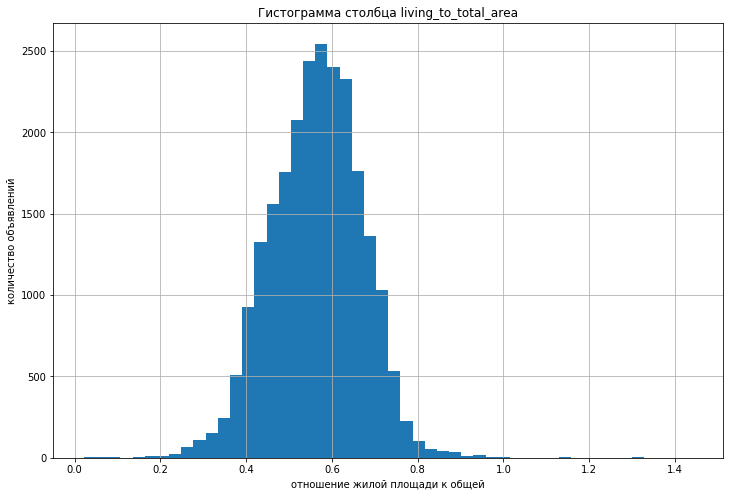

In [119]:
# построим распределение отношения жилой площади к общей

data_flats['living_to_total_area'].hist(bins=50, figsize=(12,8), grid=True)
plt.title('Гистограмма столбца living_to_total_area')
plt.xlabel('отношение жилой площади к общей')
plt.ylabel('количество объявлений')

Text(0, 0.5, 'количество объявлений')

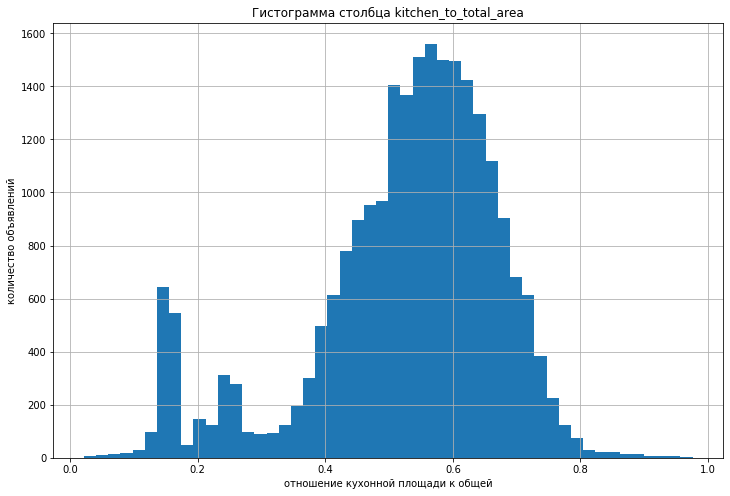

In [120]:
data_flats['kitchen_to_total_area'].hist(bins=50, figsize=(12,8), grid=True)
plt.title('Гистограмма столбца kitchen_to_total_area')
plt.xlabel('отношение кухонной площади к общей')
plt.ylabel('количество объявлений')

In [121]:
data_flats.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_id,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_group,living_to_total_area,kitchen_to_total_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,51.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,10,120370.370370,3,3,2019,другой,0.472222,0.472222
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,False,False,18.6,2,посёлок шушары,12817.0,18603.0,0,NaN,0,NaN,81,3,82920.792079,1,12,2018,первый,0.460396,0.460396
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,False,False,34.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,6,92785.714286,3,8,2015,другой,0.612500,0.612500
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,59.5,9,False,False,False,16.0,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424,10,408176.100629,4,7,2015,другой,0.374214,0.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,32.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,10,100000.000000,1,6,2018,другой,0.320000,0.320000


### Промежуточный вывод 3

1. В таблицу был добавлен столбец с ценой квадратного метра `price_per_square_meter`. Наблюдаем нормальное распределение рассчитанной величины


2. В таблицу были добавлены столбцы с днем недели, месяцем и годом публикации объявления. Были построены гистограммы этих столбцов, по которым можно сказать:

    - Вы выходные публикуется значительно меньше объявлений, чем в будние дни. При этом в будние дни публикуется примерно равное количество объявлений. (*в целом ожидаемо - в выходные люди хотят отдыхать, а не заниматься продажей недвижимости*)
      
    - Зависимость количетсва публикуемых объявлений от месяца года неочевидная - в летние месяцы публикуется примерно равное количество объявлений; начиная с сентября и по ноябрь количество объявлений растет прктически линейно, резкоя спадая в декабре и январе; начиная с февраля и по май, количество объявлений уменьшается практически по квадратичному закону.

    - На диаграмме количества объявлений, опубликованных в разные годы, можно заметить, что в 2017-2018 годах было опубликовано значительно большее количетсво объявлений, чем в соседние 2016 и 2019 годы. При этом с 2014 по 2016 наблюдался стабильный рост рынка недвижимости. Вероятно, такие большие значения в 2017 и 2018 годах связаны с глобальными процессами, происходившими в экономике РФ, но это требует дополнительного изучения


3. В таблицу был добавлен столбец с характеристикой этажа квартиры (первый/последний/другой) - `floor_group`


4. В таблицу были добавлены столбцы с отношением жилой площади к общей (`living_to_total_area`) и площади кухни к общей площади (`kitchen_to_total_area`). Для полученных столбцов были построенны гистограммы, по которым можно сказать:
    - отношение жилой площади к общей распределено не по нормальному закону. Из этого можно сделать вывод,  что как минимум один из столбцов этих площадей обладает значительными артефактами в данных. Важно подчеркнуть, что эти артефакты появились не в результате предобработки (т.к. предобработка данных по этим столбцам не велась)
    -  распределение отношения кухонной площади к общей напоминает нормальное

<a id="шаг_4" ></a>

## Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Изучите столбцы площадь, цена, число комнат, высота потолков

#### Площадь

Чтобы было удобнее работать, выберем только столбцы, которые содержат площади

In [122]:
# создаем датафрейм только с площадями и вызывыаем первые 5 строк

data_flats_area = data_flats[
    ['total_area', 'living_area', 'kitchen_area']
].copy()

data_flats_area.head()

,total_area,living_area,kitchen_area
0,108.0,51.0,51.0
1,40.4,18.6,18.6
2,56.0,34.3,34.3
3,159.0,59.5,16.0
4,100.0,32.0,32.0


Изучем полученный датафрейм с помощью describe()

In [123]:
data_flats_area.describe()

,total_area,living_area,kitchen_area
count,23699.000000,23697.000000,23699.000000
mean,60.348651,34.430421,32.207981
std,35.654083,21.777861,22.109206
min,12.000000,2.000000,2.000000
25%,40.000000,18.600000,17.600000
50%,52.000000,30.000000,29.000000
75%,69.900000,42.300000,41.090000
max,900.000000,409.700000,409.700000


Во всех трех столбцах есть как аномально большие, так и аномально маленькие значения Построим гистограммы столбцов

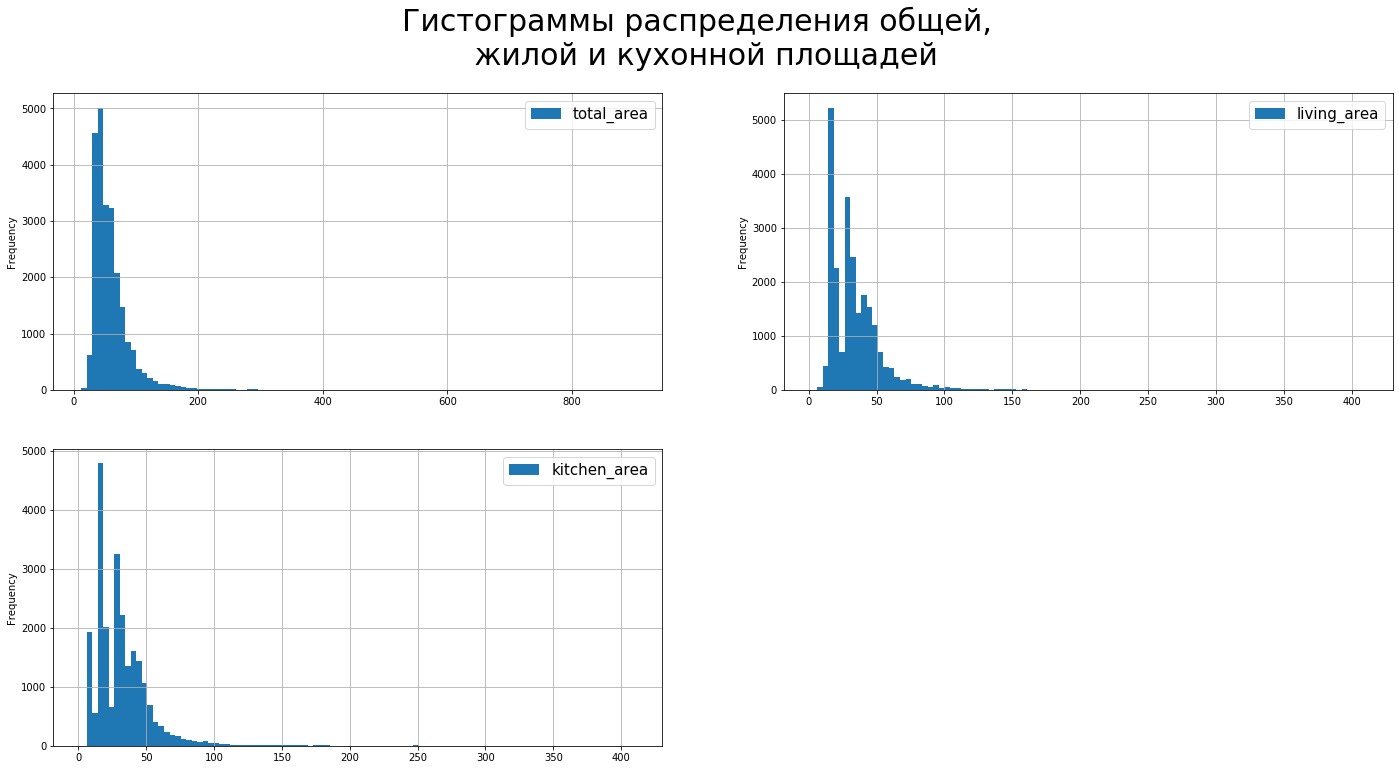

In [124]:
# в цикле проходим по всем колонкам и строим гистограммы

plt.figure(figsize=(24,12))
plt.suptitle('Гистограммы распределения общей, \n жилой и кухонной площадей', fontsize=30)
number=1

for col in data_flats_area.columns:
    plt.subplot(2,2,number)
    data_flats_area[col].plot(kind='hist', bins=100, label=col)
    plt.legend(loc='upper right', fontsize=15)
    plt.grid()
    number+=1

Видно, что все три распределения напоминают нормальное (только у столбца `living_area` есть особенность в виде провала рядом с пиком). При этом каждое из распределений имеет длинный хвост из достаточно редких столбцов. Постараемся избавиться от него, построив на гистограмме первые 99% значений

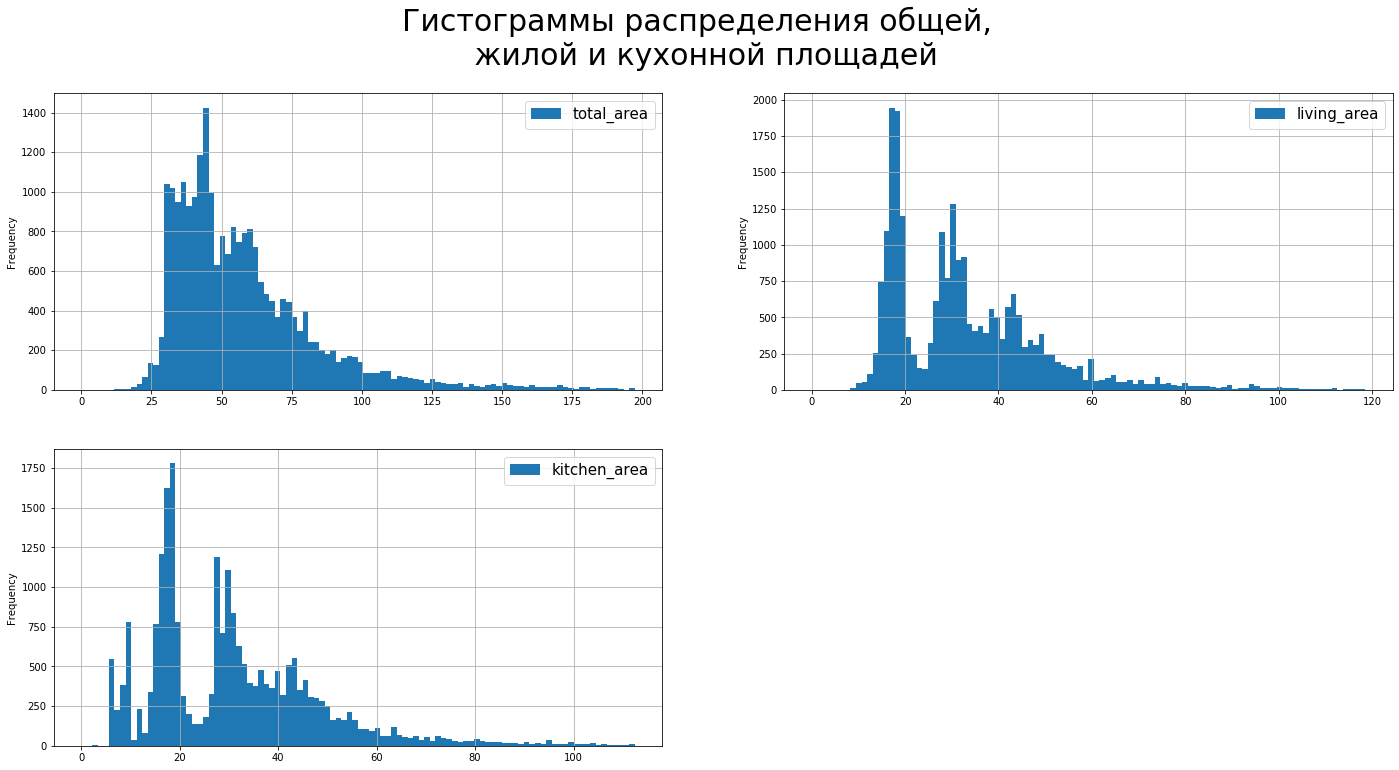

In [125]:
# в цикле проходим по всем столбцам и строим гистограммы с указанием интересующего интервала

plt.figure(figsize=(24,12))
plt.suptitle('Гистограммы распределения общей, \n жилой и кухонной площадей', fontsize=30)
number=1

for col in data_flats_area.columns:
    right = data_flats_area[col].quantile(0.99)
    left = 0
    plt.subplot(2,2,number)
    data_flats_area[col].plot(kind='hist', bins=100, range=(left,right), label=col)
    plt.legend(loc='upper right', fontsize=15)
    plt.grid()
    number+=1

Отлично, от "хвостов" избавились. При этом стали хорошо видны особенности каждого из распределений:
1. Общая площадь распределена нормально

2. У жилой площади наблюдаем два четко выраженных пика. Скорее всего это связано с тем, что для некоторых квартир под жилой подразуемевалась не только площадь всех комнат, но и, например площадь балкона/санузла. Или для некоторых квартир, кухня считалась комнатой. Тем не менее, огибающая двух пиков стремится к огибающей нормального распределения. Другие предположения требуют явного указания как именно заполнялся этот столбец - пользователем или автоматически

3. Распределение кухонных площадей представляет собой практически набор отдельных пиков, которые в свою очередь распределены практически норммально. Еще один факт, подтверждающий, что предположение о типовых кухнях было верным. Фактически можно попробовать аппроксимировать это распределение несколькими гауссами/лоренцами

**При этом мы выяснили, что можно смело отбросить последний процент в каждом из столбцов и выборка станет более репрезентативной**

Чтобы проверить предположения, выдвинутые о распределениях жилой и кухонной площади, посчитаем корреляцию для всех трех столбцов. Если предположения верны, то жилая и общая площадь должны хорошо коррелировать, а кухонная и общая должны коррелировать слабо

<a id="корреляция_площадей"></a>

In [126]:
# считаем корреляцию столбцов в таблице с площадями

data_flats_area.corr()

,total_area,living_area,kitchen_area
total_area,1.000000,0.919421,0.838640
living_area,0.919421,1.000000,0.916161
kitchen_area,0.838640,0.916161,1.000000


Как и предполагалось - общая и жилая площадь коррелируют очень сильно, при этом кухонная и общая значительно слабее

#### Цена

По аналогии с площадями, выберем из общей таблицы только столбец с полной ценой

In [127]:
# создаем датафрейм только с ценами и вызывыаем первые 5 строк

data_flats_price = data_flats[['last_price']].copy()
data_flats_price.head()

,last_price
0,13000000.0
1,3350000.0
2,5196000.0
3,64900000.0
4,10000000.0


Изучем полученный датафрейм с помощью describe()

In [128]:
data_flats_price.describe()

,last_price
count,2.369900e+04
mean,6.541549e+06
std,1.088701e+07
min,1.219000e+04
25%,3.400000e+06
50%,4.650000e+06
75%,6.800000e+06
max,7.630000e+08


Снова наблюдаем как аномально маленькие значений, так и аномально большие. Построим гистограмму столбца `last_price`

Text(0.5, 1.0, 'Гистограмма полного столбца last_price')

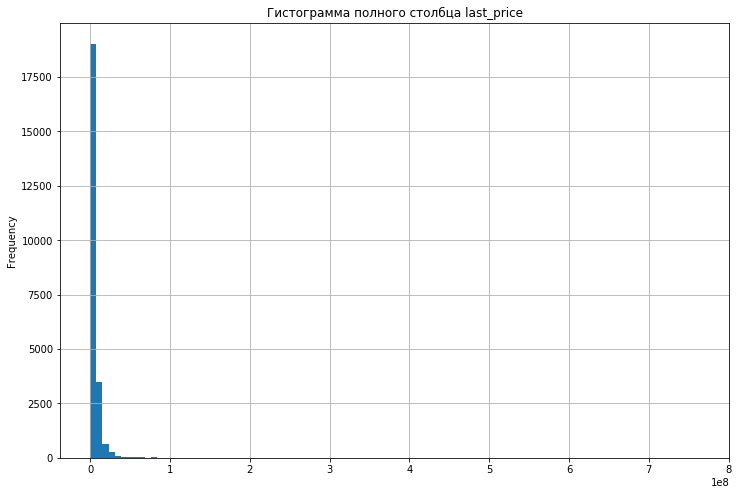

In [129]:
# строим гистограмму столбца last_price

plt.figure(figsize=(12,8))

data_flats_price['last_price'].plot(kind='hist', bins=100)
plt.grid()
plt.title('Гистограмма полного столбца last_price')

Очень большие и, судя по гистограмме, очень редкие события опять не позволяют рассмотреть структуру распределения. Снова избавимся от "хвоста" больших значений, построив первые 99% данных

Text(0.5, 1.0, 'Гистограмма первых 99 процентилей столбца last_price')

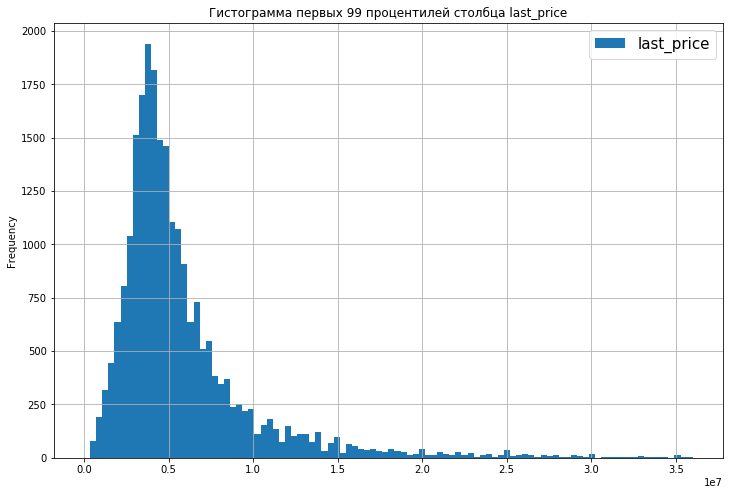

In [130]:
# строим гистограмму первых 99% столбца last_price

plt.figure(figsize=(12,8))

right = data_flats_price['last_price'].quantile(0.99)
left = 0

data_flats_price['last_price'].plot(kind='hist', bins=100, range=(left,right))
plt.legend(loc='upper right', fontsize=15)
plt.grid()

plt.title('Гистограмма первых 99 процентилей столбца last_price')

Наблюдаем прекрасное нормальное распределение с пиком в районе 4.5e6. Снова получается, что **можно отбросить последний процент значений** и картина будет гораздо более репрезентативной

#### Число комнат

Изучим столбец с числом комнат с помощью метода describe()

In [131]:
# вызываем describe для выбранного столбца

data_flats['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Минимальное значение - 0, может показаться странным. Но в нашей таблице помимо "стандартных" квартир присутствуют и квартиры-студии. Скорее всего, именно для студий число комнат равно 0. Проверим это

In [132]:
print('Всего студий в таблице', data_flats['studio'].sum())

Всего студий в таблице 149


In [133]:
# группируем данные по столбцу rooms и изучаем столбец studio

data_flats.groupby('rooms').agg({'studio': ['mean', 'sum','count']})

studio             
           mean    sum count
rooms                       
0      0.700508  138.0   197
1      0.001367   11.0  8047
2      0.000000    0.0  7940
3      0.000000    0.0  5814
4      0.000000    0.0  1180
5      0.000000    0.0   326
6      0.000000    0.0   105
7      0.000000    0.0    59
8      0.000000    0.0    12
9      0.000000    0.0     8
10     0.000000    0.0     3
11     0.000000    0.0     2
12     0.000000    0.0     1
14     0.000000    0.0     2
15     0.000000    0.0     1
16     0.000000    0.0     1
19     0.000000    0.0     1

Ну как и предполагалось 0 комнат - это с 70% вероятностью квартира-студия. Теперь построим гистограмму столбца с количеством комнат, чтобы оценить какие квартиры наиболее распространены на рынке недвижимости

Text(0.5, 0, 'количество комнат')

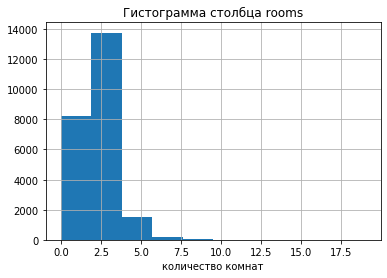

In [134]:
data_flats['rooms'].hist()
plt.title('Гистограмма столбца rooms')
plt.xlabel('количество комнат')

Из сгруппированной таблицы хорошо видно, что квартир с количеством комнат большим чем 4 очень мало. При этом квартир с количеством комнат, большим чем 8 вообще единицы. Поэтому, на этапе чистки данных от выбивающихся значений, **отбросим квартиры с числом комнат больше 9**

#### Высота потолков

Анализ столбца с высотой потолков проведен еще на этапе заполенения пропусков. На [гистограммах](#выбросы_потолок) продемонстрированы две группы выбросов. Также ранее было сказано, что нужно отсечь квартиры с потолками ниже 2.0 метров и выше 5.0, т.к. такие квартиры очень редки и являются скорее ошибками в данных, а не какой-то особенностью распределения. При этом оставшиеся значения распределены нормально. Продемонстрируем это

Text(0, 0.5, 'количество квартир')

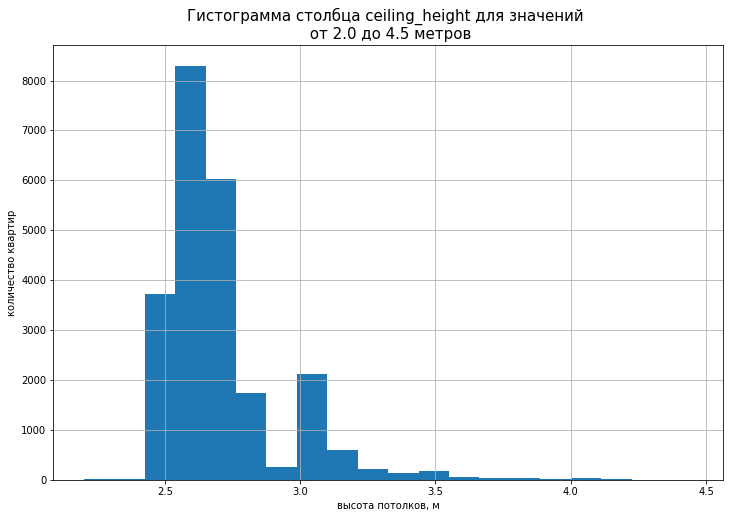

In [135]:
data_flats.query('2.0 < ceiling_height < 4.5')['ceiling_height'].hist(bins=20, figsize=(12,8))
plt.title('Гистограмма столбца ceiling_height для значений \n от 2.0 до 4.5 метров', fontsize=15)
plt.xlabel('высота потолков, м')
plt.ylabel('количество квартир')

#### Время продажи квартиры

Выделим столбец с количеством дней, которые квартира была на продаже, в отдельный датафрейм. При этом оставим только те строки, где этот параметр заполнен.

In [136]:
# выделяем days_exposition в отдельный датафрейм и вызываем первые 5 строк

data_flats_exposition = data_flats[['days_exposition']].copy()
data_flats_exposition.head()

,days_exposition
0,NaN
1,81
2,558
3,424
4,121


In [137]:
# убираем строки с NaN

data_flats_exposition.dropna(inplace = True)
data_flats_exposition.head()

,days_exposition
1,81
2,558
3,424
4,121
5,55


Добавим столбец с количеством лет, которые продавалась квартира. Сделаем это, так как если дней становится больше 365, то проводить сравнительный анализ, оперируя категориями "много" и "мало", удобнее, если смотреть на количество полных лет

In [138]:
data_flats_exposition['years_exposition'] = (data_flats_exposition['days_exposition'] / 365).round(1)

Изучим получившуюся таблицу с помощью метода describe()
<a id="описание_времени_продажи"></a>

In [139]:
data_flats_exposition.describe()

,days_exposition,years_exposition
count,20518.000000,20518.000000
mean,180.888634,0.494293
std,219.727988,0.603945
min,1.000000,0.000000
25%,45.000000,0.100000
50%,95.000000,0.300000
75%,232.000000,0.600000
max,1580.000000,4.300000


Наблюдаем аномально маленькие значения. Сложно сказать, является ли 1580 дней (4.3 года) продажи аномально большим значением. Предположим что да, т.к. 75% значений укладываются до 232 дней.

Text(0.5, 0, 'количество дней существования объявления')

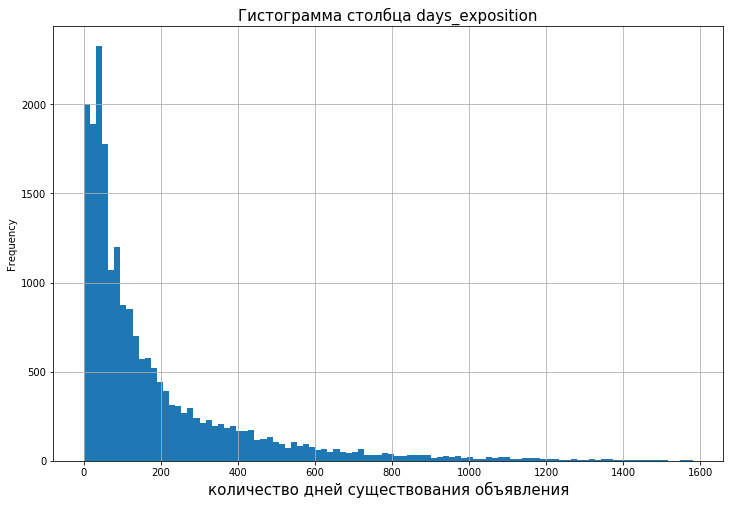

In [140]:
plt.figure(figsize=(12,8))

data_flats_exposition['days_exposition'].plot(kind='hist', bins=100)
plt.grid()
plt.title('Гистограмма столбца days_exposition', fontsize=15)
plt.xlabel('количество дней существования объявления', fontsize=15)

Рассчитаем среднее и медианное время продажи квартиры и сохраним их в отдельных переменных, чтобы далее отобразить на графиках

In [141]:
# считаем среднее и медианное время продажи

mean_time = data_flats_exposition['days_exposition'].mean()
print('Среднее время продажи {:.0f} день'.format(mean_time))

median_time = data_flats_exposition['days_exposition'].median()
print('Медианное время продажи {:.0f} дней'.format(median_time))


Среднее время продажи 181 день
Медианное время продажи 95 дней


Построим гистограмму, отобразив на ней среднее и медианное время продажи

Text(0.5, 0, 'количество дней существования объявления')

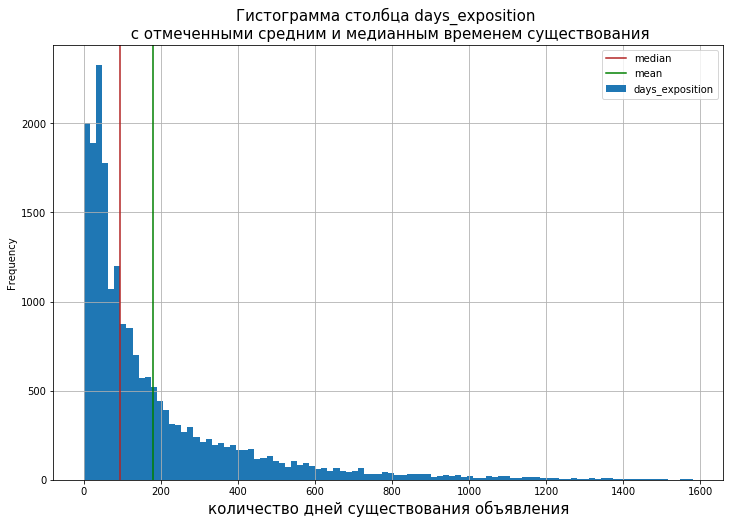

In [142]:
plt.figure(figsize=(12,8))

left = data_flats_exposition['days_exposition'].quantile(0)
right = data_flats_exposition['days_exposition'].quantile(1)

data_flats_exposition['days_exposition'].plot(kind='hist', bins=100, range=(left,right), label='days_exposition')
plt.grid()

plt.axvline(x = median_time, color='firebrick', label='median')
plt.axvline(x = mean_time, color='green', label='mean')



plt.legend()
plt.title('Гистограмма столбца days_exposition \n с отмеченными средним и медианным временем существования', fontsize=15)
plt.xlabel('количество дней существования объявления', fontsize=15)

С помощью метода [describe](#описание_времени_продажи) видно, что 75% продаж происходит менее чем за 232 дня. Нам нужно определить некоторые критерии, которые позволят определить идет ли продажа необычно медленно/быстро.

По гистограмма видно, что слева от основного пика есть вспомогательный пик очень маленьких значений. Можно определить координату провала между двумя этими пиками (*а его левый край это 10-й процентиль, ведь bins=100*) и использовать ее в качестве минимального времени продажи, после которого можно считать, что квартира продалась за "нормальное" время.

Так как похожих особенностей для больших времен продажи мы не наблюдаем, в качестве верхнего предела нормального времени можно использовать 90-й процентиль времени продажи

In [143]:
# верхний предел нормального времени продажи квартиры

roof_normal_time = int(round(data_flats_exposition['days_exposition'].quantile(.90),0))
print('Верхняя граница для "нормального" времени продажи квартиры =', roof_normal_time, 'дней')

Верхняя граница для "нормального" времени продажи квартиры = 460 дней


In [144]:
# нижний предел нормального времени продажи квартиры

basement_normal_time = int(round(data_flats_exposition['days_exposition'].quantile(.10),0))
print('Нижняя граница для "нормального" времени продажи квартиры =', basement_normal_time, 'дней')

Нижняя граница для "нормального" времени продажи квартиры = 17 дней


Построим теперь гистограмму для "нормальных" времен продажи

Text(0.5, 0, 'количество дней существования объявления')

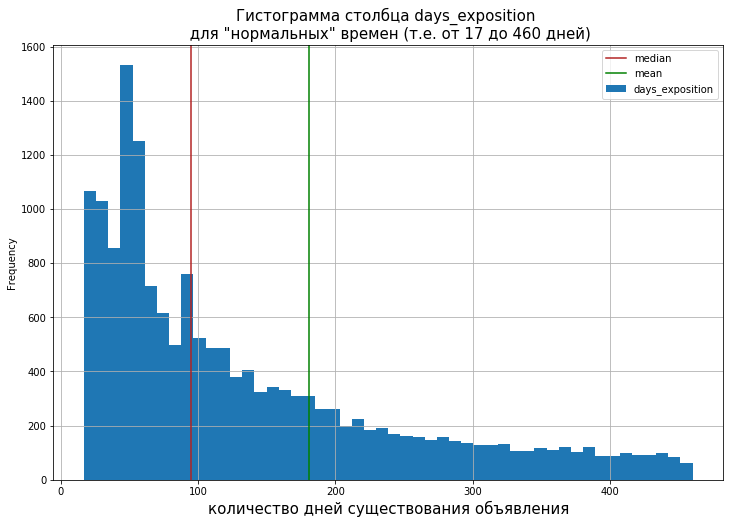

In [145]:
plt.figure(figsize=(12,8))

left = basement_normal_time
right = roof_normal_time

data_flats_exposition['days_exposition'].plot(kind='hist', bins=50, range=(left,right), label='days_exposition')
plt.grid()

plt.axvline(x = median_time, color='firebrick', label='median')
plt.axvline(x = mean_time, color='green', label='mean')



plt.legend()
plt.title('Гистограмма столбца days_exposition \n для "нормальных" времен (т.е. от 17 до 460 дней)', fontsize=15)
plt.xlabel('количество дней существования объявления', fontsize=15)

Получаем нечто похожее на нормальное распределение

### Уберите редкие и выбивающиеся значение

Перед тем как начинать чистку данных, избавимся от колонки `total_area_id` которую мы создали в процессе обработки

In [146]:
# удаляем лишний столбец

try:

    data_flats.drop(['total_area_id'], axis=1, inplace=True)
    
except KeyError:
    
    print('Колонка удалена')

Мы изучили столбцы содержащие площадь, цена, число комнат, высота потолков и время продажи - теперь можно убрать редкие и выбивающиеся значения из них для того, чтобы при рассчете корреляции между показателями они не вносили ошибку.

Какие значения оставляем в столбцах:
1. `total_area`, `living_area`, `kitchen_area`
    - первые 99 процентилей
    
    
2. `last_pice`
    - первые 99 процентилей
    
    
3. `rooms`
    - весть столбец
    
    
4. `ceiling_height`
    - значения от 2.0 до 4.5 метров
    
    
5. `days_exposition`
    - от $10^{го}$ до $90^{го}$ процентиля значений
    
    
6. `rooms`
    - до 10 
    
   
7. `floors_total`
    - до 30

In [147]:
# верхний предел площадей

total_area_roof = data_flats['total_area'].quantile(0.99)
living_area_roof = data_flats['living_area'].quantile(0.99)
kitchen_area_roof = data_flats['kitchen_area'].quantile(0.99)

# верхний предел цены

last_price_roof = data_flats['last_price'].quantile(0.99)

# верхний и нижний предел высоты потолка

ceiling_height_roof = 4.5
ceiling_height_basement = 2.0

# верхний и нижний предел времени продажи

days_exposition_basement = data_flats_exposition['days_exposition'].quantile(0.10)
days_exposition_roof = data_flats_exposition['days_exposition'].quantile(0.90)

# верхний предел количества квартир

rooms_roof = 10

# верхний предел количества этажей в доме

floors_total_roof = 30

In [148]:
print('Строк до чистки',data_flats.shape[0])

data_flats_clear = data_flats.query('total_area < @total_area_roof\
                                    and living_area < @living_area_roof\
                                    and kitchen_area < @kitchen_area_roof\
                                    and last_price < @last_price_roof\
                                    and @ceiling_height_basement < ceiling_height < @ceiling_height_roof\
                                    and @days_exposition_basement < days_exposition < @days_exposition_roof\
                                    and rooms < @rooms_roof\
                                    and floors_total < @floors_total_roof').copy()

print('Строк после чистки',data_flats_clear.shape[0])
print('Количество данных уменьшилось на {: .2%}'.format(1 - data_flats_clear.shape[0] / data_flats.shape[0]))

Строк до чистки 23699
Строк после чистки 16005
Количество данных уменьшилось на  32.47%


Удалено 32.47% данных - очень много. Тем не менее, у нас осталось еще целых 16031 строк - должно хватить для расчета корреляций без серьёзных ошибок

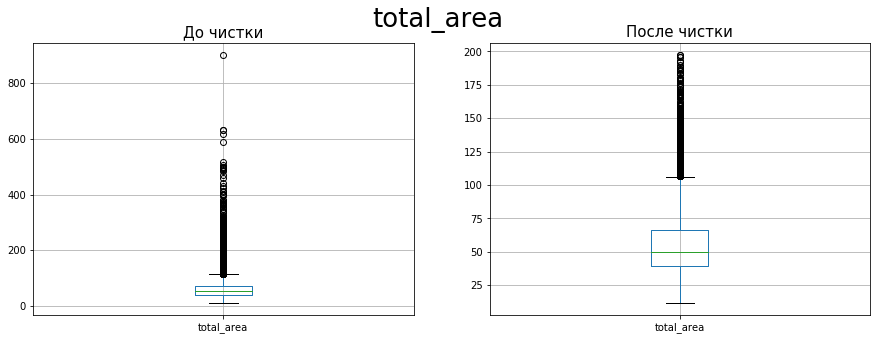

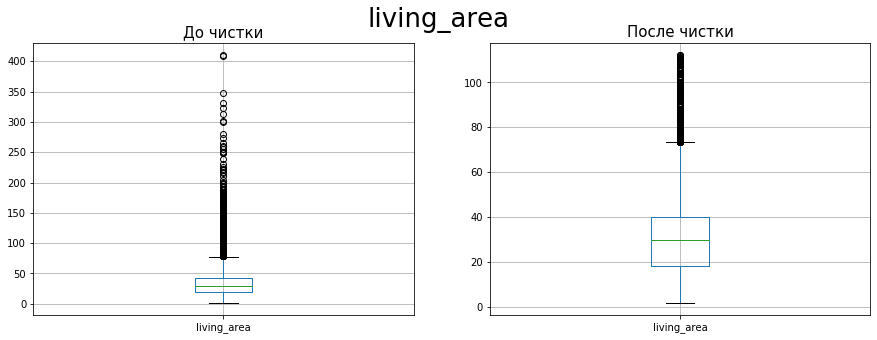

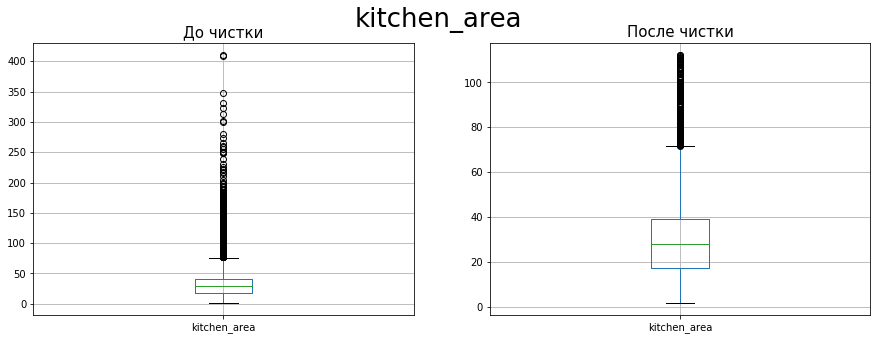

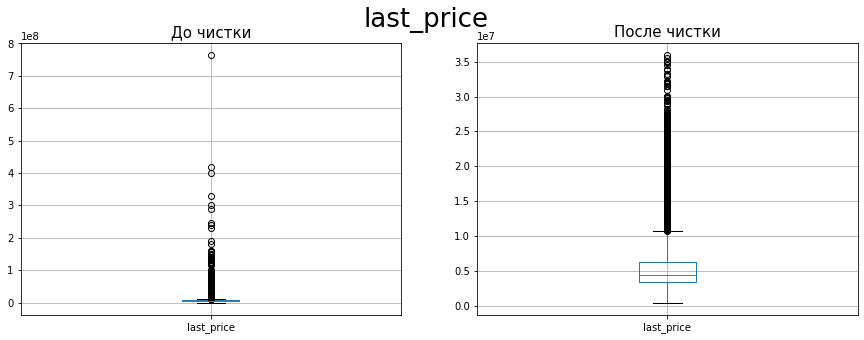

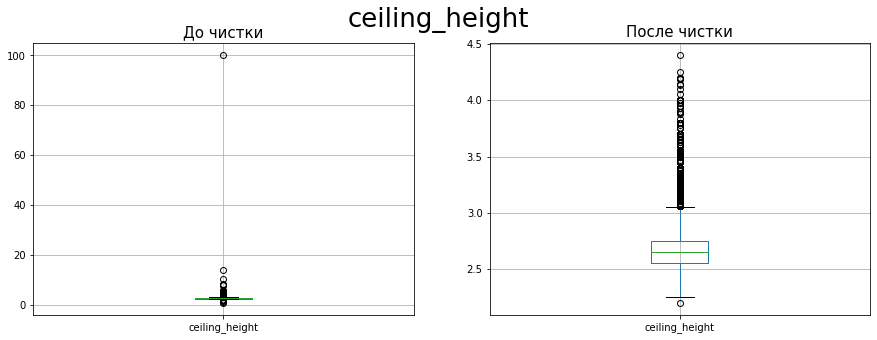

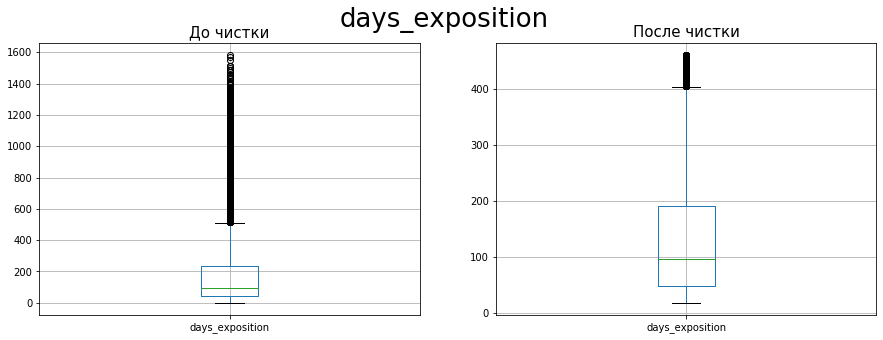

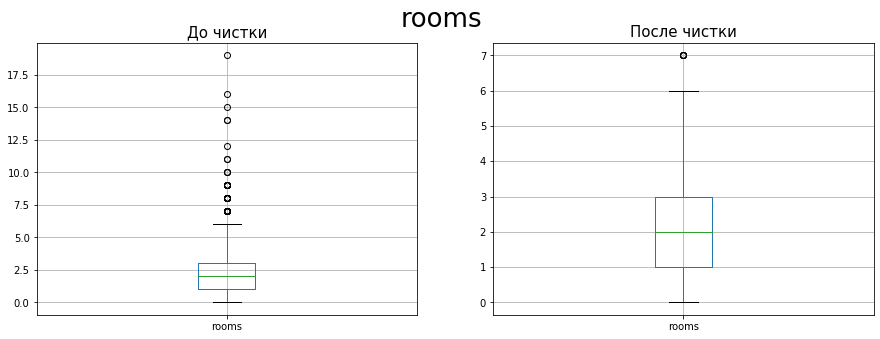

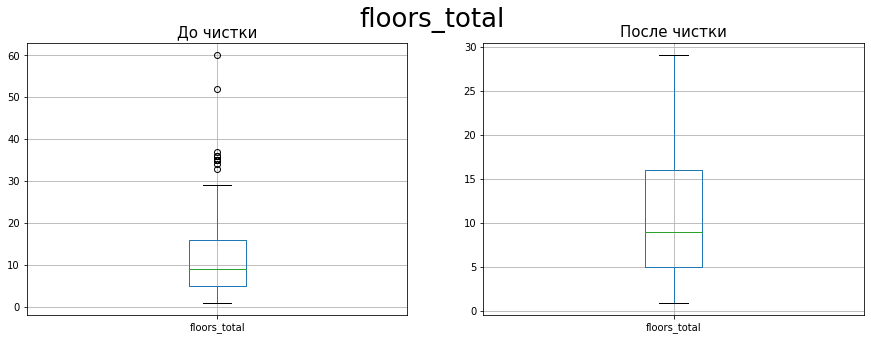

In [149]:
for column in ['total_area', 'living_area', 'kitchen_area', 'last_price', 'ceiling_height', 'days_exposition', 'rooms', 'floors_total']:
    plt.figure(figsize=(15, 5))
    plt.suptitle(column, fontsize=26)
    
    plt.subplot(1,2,1)
    data_flats.boxplot(column)
    plt.title('До чистки', fontsize=15)
    
    plt.subplot(1,2,2)
    data_flats_clear.boxplot(column)
    plt.title('После чистки', fontsize=15)

### Какие факторы больше всего влияют на стоимость квартиры

Чтобы определить какие факторы значительно влияют на стоимость квартиры, рассчитаем корреляцию между столбцом `last_price` и всеми остальными

Будем считать, что фактор значительно влияет на стоимость квартиры ,если абсолютное значение коэффициента корреляции между ними больше или равно 0.3

In [150]:
col_corr = correlation_list (data_flats_clear, 'last_price', return_corr_dict = True)

Корреляция между столбцами last_price и total_images = 0.16059709382211257

Корреляция между столбцами last_price и last_price = 1.0

Корреляция между столбцами last_price и total_area = 0.7710685534958727

Столбцы last_price и first_day_exposition - несовпадение типов

Корреляция между столбцами last_price и rooms = 0.4713227086353684

Корреляция между столбцами last_price и ceiling_height = 0.39404500001161524

Корреляция между столбцами last_price и floors_total = 0.09760607264864758

Корреляция между столбцами last_price и living_area = 0.6427552532635313

Корреляция между столбцами last_price и floor = 0.09053022358032023

Корреляция между столбцами last_price и is_apartment = 0.020446865960373862

Корреляция между столбцами last_price и studio = -0.05513442573495714

Корреляция между столбцами last_price и open_plan = -0.032292792154479034

Корреляция между столбцами last_price и kitchen_area = 0.5806564678531724

Корреляция между столбцами last_price и balcony = 0.06239866777337

In [151]:
# собираем таблицу с коэффициентами корреляции, чтобы потом сравнить их с аналогичными коэффициентами в центарльном сегменте

corr_df = pd.DataFrame(data=col_corr.values(), index=col_corr.keys(), columns=['whole'])

Не получилось рассчитать корреляцию цены и характеристики этажа, т.к. характеристика этажа типа 'object'. Придется создать еще один столбец с id характеристики этажа. Заполним этот столбец по такому принципу:
1. первый = 0
2. последний = 1
3. другой = NaN

In [152]:
#  функция, возвращающая id группы этажа

def floor_group_set_id(group):
    if group == 'первый':
        return 0
    elif group == 'последний':
        return 1
    else:
        return np.nan

In [153]:
data_flats_clear['floor_group_id'] = data_flats_clear['floor_group'].apply(floor_group_set_id)

data_flats_clear['last_price'].corr(data_flats_clear['floor_group_id'])

0.1280066290799265

В результате видим, что наиболее значимыми факторами, влияющими на на цену квартиры оказываются **площадь** (общая, кухонная и жилая), **количество комнат**, **высота потолков**, **близость к центру** и **цена за квадратный метр**. Если учесть, что [общая площадь в свою очередь хорошо коррелирует с жилой и кухонной](#корреляция_площадей), то можно сказать, что цена просто коррелирует с общей площадью. Также цена не может не коррелировать со стоимостью квадратного метра, т.к. это по определению зависимые величины.

Итого, самым значительным образом на стоимость квартиры влияет:
1. Общая площадь

2. Количество комнат

3. Высота потолков

4. Близость к центру (именно близость, а не удаленность, т.к. коэф. корреляции отрицательный)

*этаж (первый/последний) влияет очень слабо)*

*Зависимость от даты размещение практически не наблюдается*. Тем не менее, стоит отметить, что среди факторов день/месяц/год размещения самая сильная зависимость цены прослеживается от года размещения

Отсутствие корреляции не означает отсутствие нелинейной связи между двумя столбцами. Поэтому построим графики зависимости столбца 'total_price' от столбцов, для которых возможно было рассчитать коэффициент корреляции (т.е. фактически в качестве списка столбцов можно использовать список индексов corr_df).

In [154]:
# придется поменять тип колонок с bool на float64, чтобы сработал df.plot(kind='hexbin')

data_flats_clear['is_apartment'] = data_flats_clear['is_apartment'].astype('float64')
data_flats_clear['studio'] = data_flats_clear['studio'].astype('float64')
data_flats_clear['open_plan'] = data_flats_clear['open_plan'].astype('float64')

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


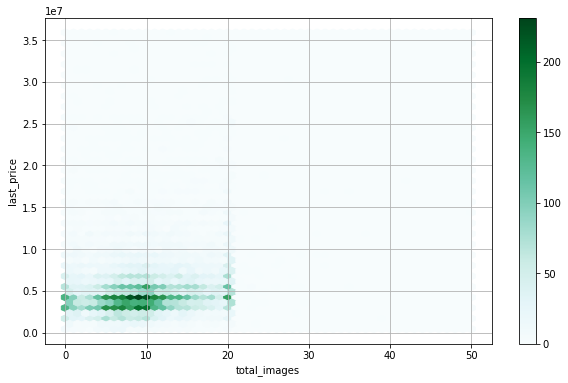

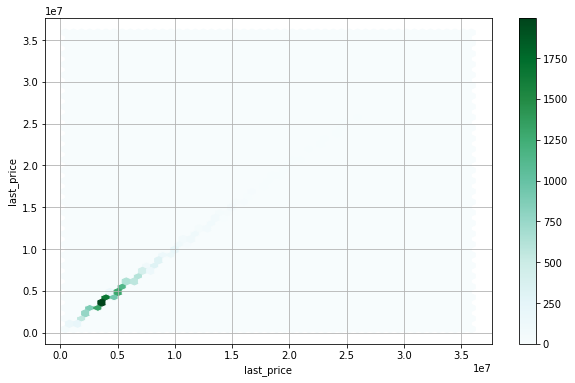

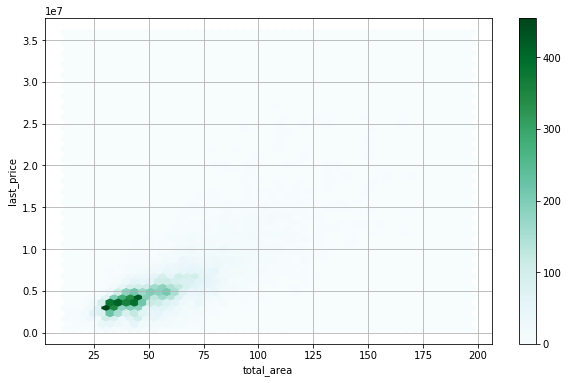

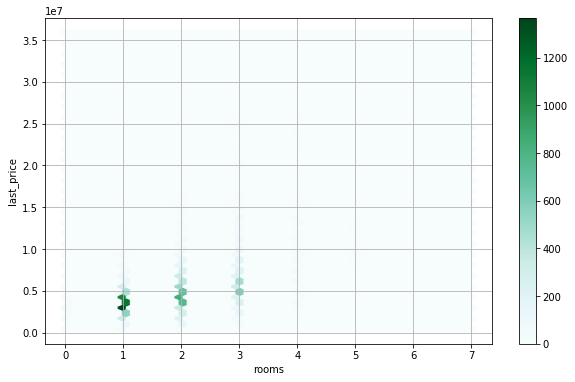

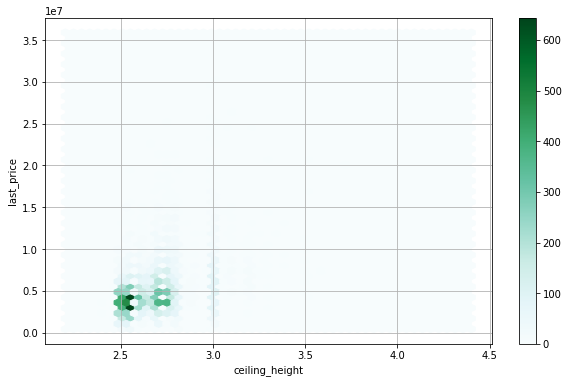

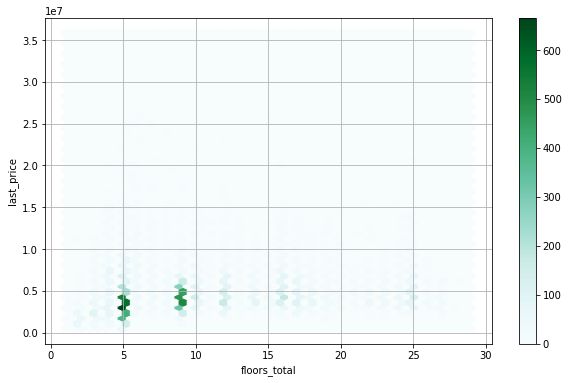

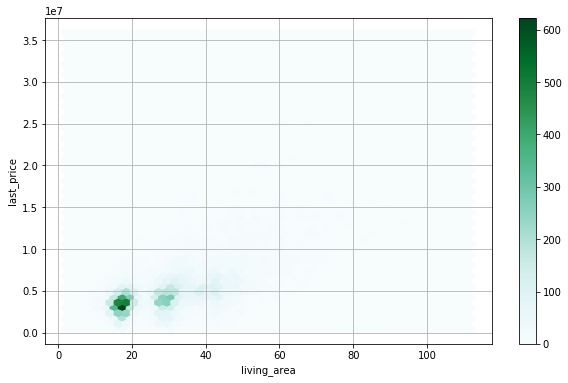

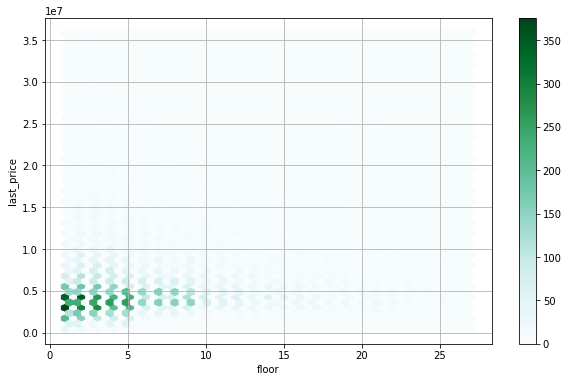

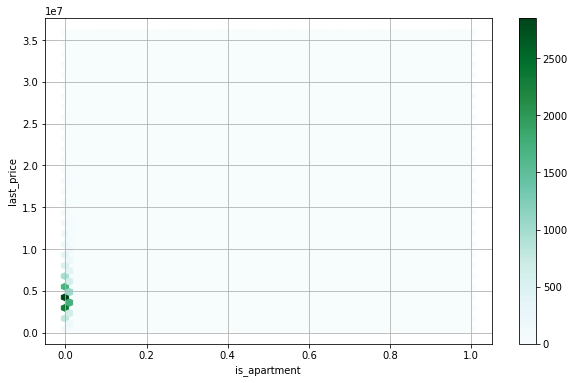

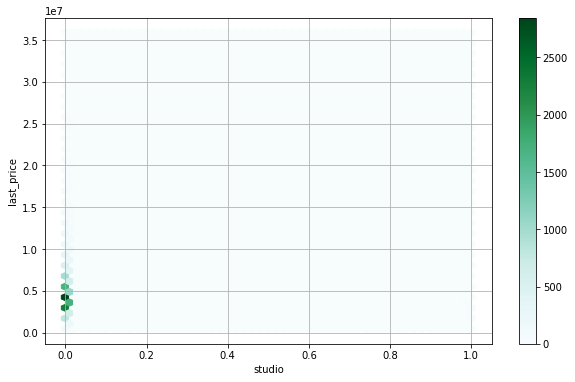

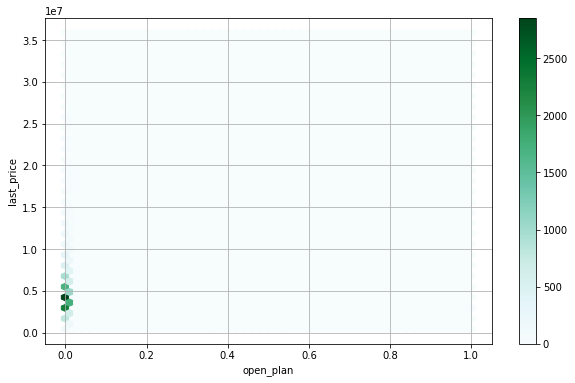

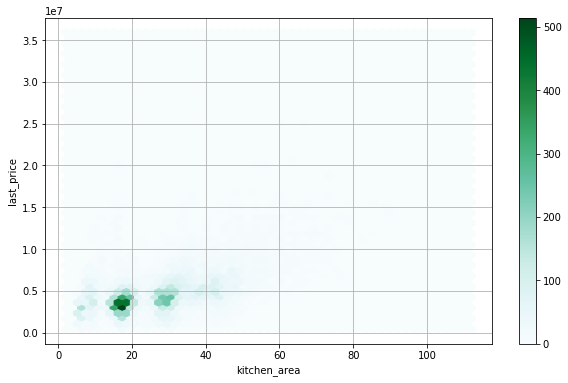

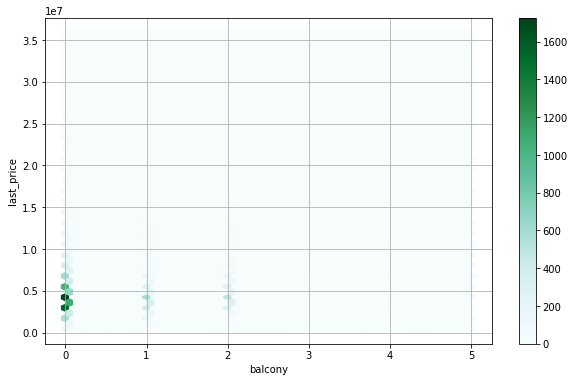

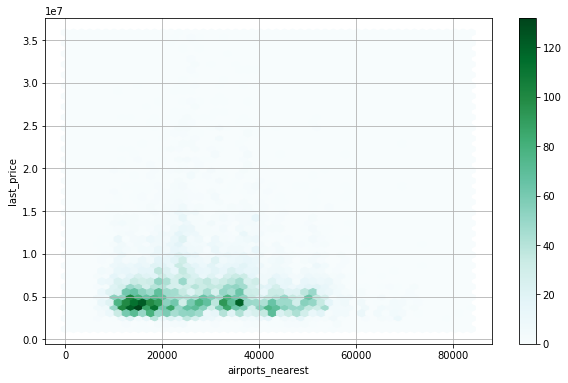

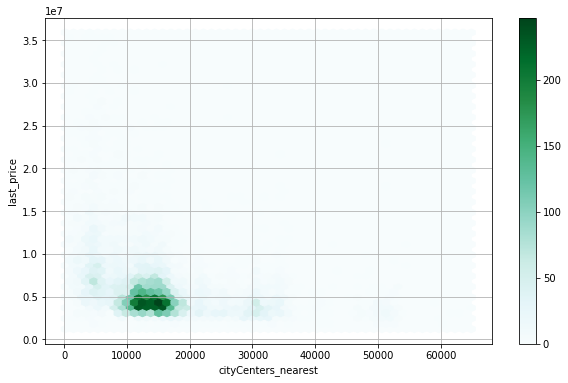

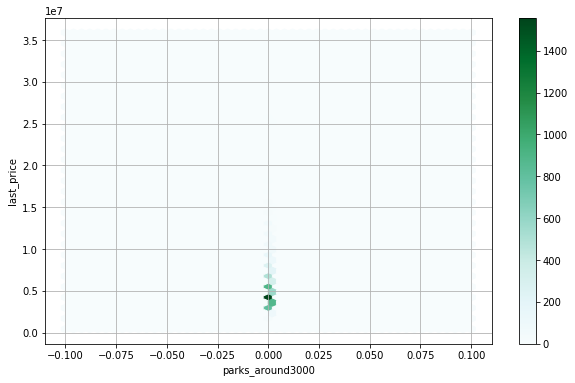

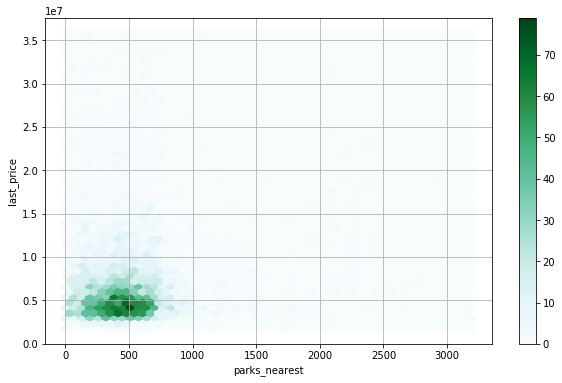

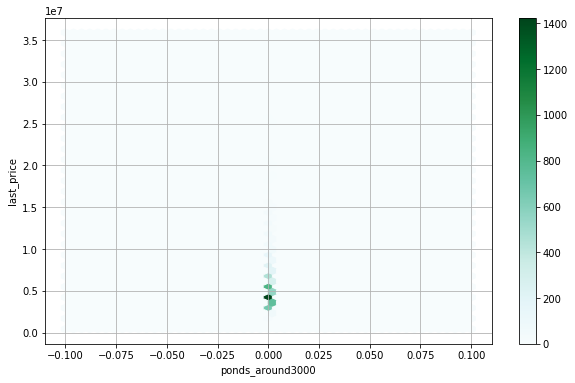

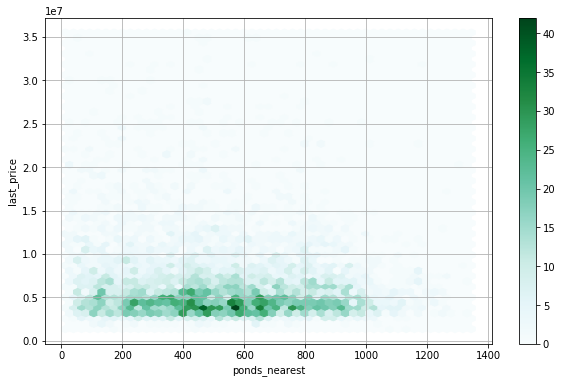

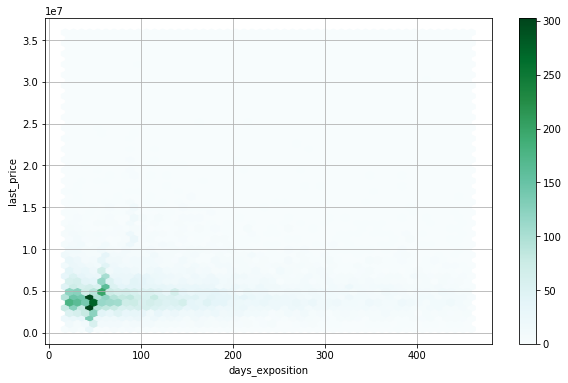

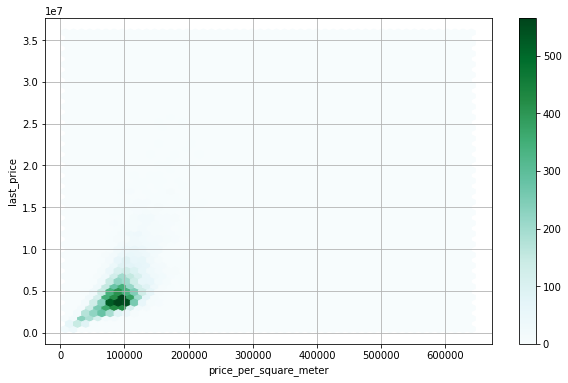

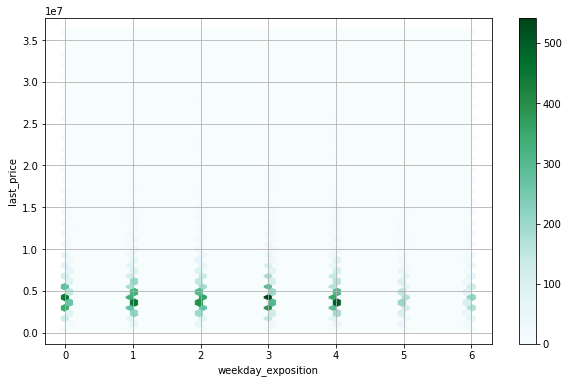

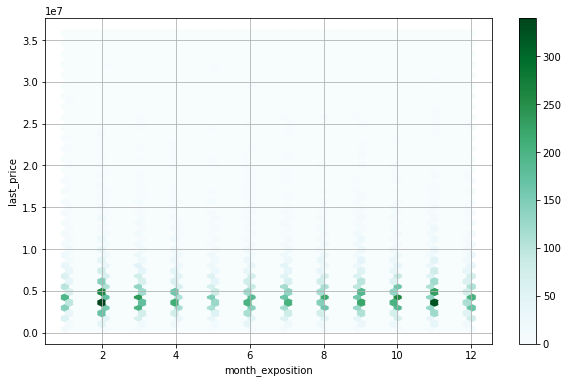

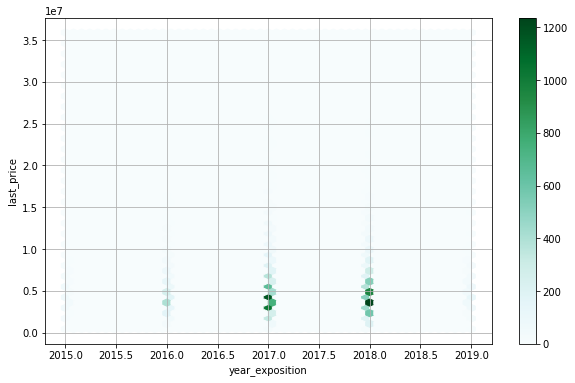

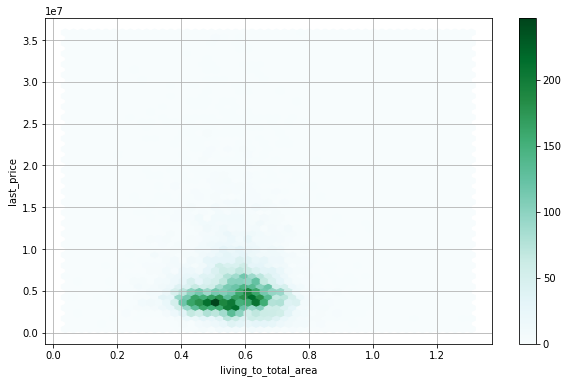

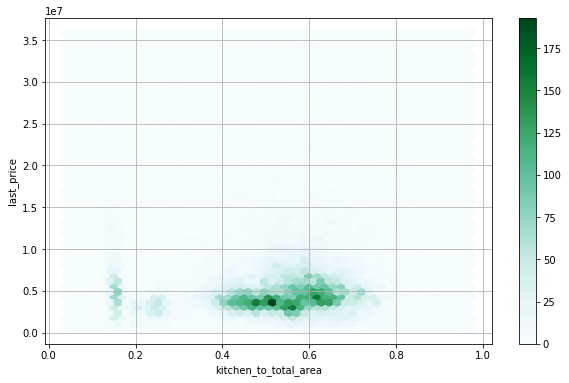

In [155]:
for col in corr_df.index.values:
    
    try:
        data_flats_clear.plot(x=col, y='last_price', kind='hexbin', figsize=(10,6), gridsize=50, sharex=False, grid=True)
    except:
        print('Колонка {} имеет нечисленный тип'.format(col))

По графикам никаких новых зависимостей, невыявленных ранее с помощью коэффициентов корреляции, продемонстрировано не было

### 10 населённых пунктов с наибольшим числом объявлений

In [156]:
# группируем данные по названию населенного пункта и считаем среднюю цену жилья, число объявлений и среднюю цену квадратного метра

data_flats_locality_pivot = pd.pivot_table(data_flats_clear,
                                          index='locality_name', values = ['last_price', 'price_per_square_meter'],
                                          aggfunc = {'last_price': ['mean'],
                                          'price_per_square_meter': ['count', 'mean']})

# переименовываем столбцы для удобства обращения

data_flats_locality_pivot.set_axis(['mean_last_price','number_of_ads', 'mean_price_per_square_meter'],
                                   axis='columns', inplace=True)

# выводим первые 5 строк

data_flats_locality_pivot.head()

,mean_last_price,number_of_ads,mean_price_per_square_meter
locality_name,,,
бокситогорск,8.480909e+05,11,17169.668246
волосово,2.004348e+06,23,40871.666588
волхов,1.681184e+06,76,34945.584319
всеволожск,3.716365e+06,282,69025.217333
выборг,3.028622e+06,172,56798.899110


In [157]:
# сортируем сгруппированную таблицу по количеству объявлений и выбираем топ 10 городов 

data_flats_locality_top_10 = data_flats_locality_pivot.sort_values(by='number_of_ads', ascending=False).head(10)


# выводим топ 10 городов по количеству объявлений
data_flats_locality_top_10.style.format("{:f}")

,mean_last_price,number_of_ads,mean_price_per_square_meter
locality_name,,,
санкт-петербург,6470777.300683,10393.000000,108801.719985
посёлок мурино,3631224.177184,412.000000,86196.635314
посёлок шушары,4020940.588235,340.000000,77782.488544
всеволожск,3716364.755319,282.000000,69025.217333
посёлок парголово,4363410.879518,249.000000,88979.381884
колпино,3846656.870445,247.000000,74021.513456
пушкин,5898555.223140,242.000000,101224.487509
деревня кудрово,4239686.956897,232.000000,93263.058282
гатчина,3298281.971831,213.000000,67382.102754


Теперь отсортируем получившуюся группу из 10 населенных пунктов двумя способами:
1. По средней цене
2. По цене квадратного метра

In [158]:
# сортируем по средней цене жилья

data_flats_locality_top_10.sort_values(by='mean_last_price', ascending=False).style.format("{:f}")

,mean_last_price,number_of_ads,mean_price_per_square_meter
locality_name,,,
санкт-петербург,6470777.300683,10393.000000,108801.719985
пушкин,5898555.223140,242.000000,101224.487509
посёлок парголово,4363410.879518,249.000000,88979.381884
деревня кудрово,4239686.956897,232.000000,93263.058282
посёлок шушары,4020940.588235,340.000000,77782.488544
колпино,3846656.870445,247.000000,74021.513456
всеволожск,3716364.755319,282.000000,69025.217333
посёлок мурино,3631224.177184,412.000000,86196.635314
гатчина,3298281.971831,213.000000,67382.102754


In [159]:
# сортируем по средней цене квадратного метра

data_flats_locality_top_10.sort_values(by='mean_price_per_square_meter', ascending=False).style.format("{:f}")

,mean_last_price,number_of_ads,mean_price_per_square_meter
locality_name,,,
санкт-петербург,6470777.300683,10393.000000,108801.719985
пушкин,5898555.223140,242.000000,101224.487509
деревня кудрово,4239686.956897,232.000000,93263.058282
посёлок парголово,4363410.879518,249.000000,88979.381884
посёлок мурино,3631224.177184,412.000000,86196.635314
посёлок шушары,4020940.588235,340.000000,77782.488544
колпино,3846656.870445,247.000000,74021.513456
всеволожск,3716364.755319,282.000000,69025.217333
гатчина,3298281.971831,213.000000,67382.102754


Топ-5 городов с самой дорогой средней ценой жилья:
1. Санкт-Петербург
2. Пушкин
3. деревня Кудрово
4. посёлок Шушары
5. Петергоф

Топ-5 городов с самой дорогой средней ценой квадратного метра:
1. Санкт-Петербург
2. Пушкин
3. деревня Кудрово
4. посёлок Парголово
5. посёлок Мурино

### Выделение центрального сегмента в Санк-Петербурге

Для начала нужно выделить сгемент квартир в Санкт-Петербурге. Начнем с того, что выясним - в какой форме Санкт-Петербуг может фигурировать в столбце lacality_name. Для этого:

1. Выделим в отдельную таблицу все варианты названия локации из таблицы data_flats_clear (воспользуемся для этого value_counts)
2. Проведем лемматизацию полученной таблицы
3. Сравним полученные леммы с леммой Санкт-Петербурга и выведем все варианты, где леммы совпали

In [160]:
# подключаем библиотеку для лемматизации

from pymystem3 import Mystem
m = Mystem()

In [161]:
# получаем список названий всех локаций

locality_names_list = data_flats_clear['locality_name'].value_counts().index.values

# создаем таблицу с названиями локаций
locality_names = pd.DataFrame(data = locality_names_list, columns = ['name'])

# лемматизируем

locality_names['lemma'] = locality_names['name'].apply(m.lemmatize)


# в цикле проходим по всем леммам и ищем в них 'санкт-петербург', выводя названия локаций, где нашли таую лемму
for i in locality_names.index.values:
    if m.lemmatize('санкт-петербург')[0] in locality_names['lemma'][i]:
        print(locality_names['name'][i])

санкт-петербург


Отлично, Санкт-Петербург в таблице единственный и неповторимый. Можем получать срез по названию локации

In [162]:
# выделяем квартиры в Санкт-Петербурге и выводим первые 5 строк

data_flats_capital = data_flats_clear.query('locality_name == "санкт-петербург"').copy()
data_flats_capital.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_group,living_to_total_area,kitchen_to_total_area,floor_group_id
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,0.0,0.0,0.0,32.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.320000,NaN
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,0.0,0.0,0.0,43.6,2,санкт-петербург,50898.0,15008.0,0,NaN,0,NaN,289,88524.590164,6,2,2017,другой,0.714754,0.714754,NaN
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,0.0,0.0,0.0,20.3,0,санкт-петербург,38357.0,13878.0,1,310.0,2,553.0,137,127525.252525,3,11,2017,другой,0.512626,0.512626,NaN
15,16,4650000.0,39.0,2017-11-18,1,2.60,14,20.5,5,0.0,0.0,0.0,20.5,1,санкт-петербург,12900.0,14259.0,1,590.0,1,296.0,19,119230.769231,5,11,2017,другой,0.525641,0.525641,NaN
16,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,0.0,0.0,0.0,55.6,0,санкт-петербург,22108.0,10698.0,3,420.0,0,NaN,397,81707.317073,3,11,2017,первый,0.678049,0.678049,0.0


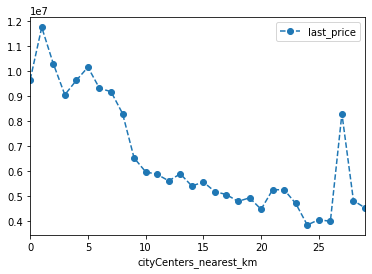

In [163]:
# создаем столбец с расстоянием до центра в километрах

data_flats_capital['cityCenters_nearest_km'] = (data_flats_capital['cityCenters_nearest'] / 1000).round(0)

# группируем цены на квартиры по расстоянию до центра в километрах и считаем среднее

data_flats_capital_pivot = pd.pivot_table(data_flats_capital, index='cityCenters_nearest_km',
                                         values='last_price',
                                         aggfunc='mean')
# предварительно строим график

data_flats_capital_pivot.plot(style='o--')

Видно, что на графике, есть странный локальный минимум в 4 точке. Вероятно, он связан с тем, что мы не убрали аномально маленькие значения из таблицы. Тем не менее, если отбросить эту точку как аномальную видно, что коэфициент наклона касательной к графику в этой точке практически не претерпевает изменения в этой точке. Так как центральный сегмент квартир мы определяем по значительному изменению построенного графика, то стоит в качестве границы центрального сегмента рассматривать 10 точку. Эта точка выбрана из-за того, что именно в ней абсолютное значение углового коэффициента касательной к графику (модуль производной) претерпевает значительное изменение

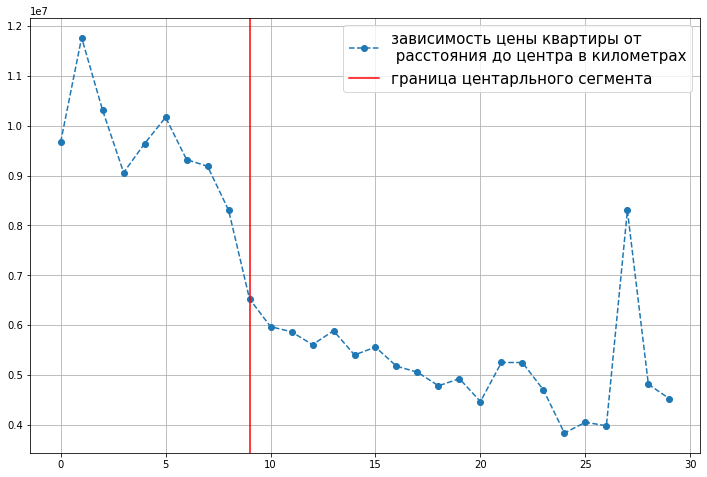

In [164]:
# строим график зависимости цены от расстояния до центра

plt.figure(figsize=(12,8))

plt.plot(data_flats_capital_pivot.index, data_flats_capital_pivot['last_price'], 'o--', 
         label='зависимость цены квартиры от \n расстояния до центра в километрах')

plt.axvline(data_flats_capital_pivot.index.values[9], color='red', label='граница центарльного сегмента')

plt.grid()
plt.legend(fontsize=15)

In [165]:
# сохраняем радиус центральной зоны в отдельную переменную

center_radius = data_flats_capital_pivot.index.values[9]

print('Радиус центрального сегмента в километрах =', center_radius)

Радиус центрального сегмента в километрах = 9.0


### Анализ центрального сегмента в Санк-Петербурге

In [166]:
# выделяем квартиры в центральном сегменте

data_flats_center = data_flats_capital.query('cityCenters_nearest_km < @center_radius').copy()

In [167]:
data_flats_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_group,living_to_total_area,kitchen_to_total_area,floor_group_id,cityCenters_nearest_km
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,0.0,0.0,0.0,32.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.320000,NaN,8.0
24,8,6500000.0,97.2,2015-10-31,2,2.80,3,46.5,1,0.0,0.0,0.0,46.5,0,санкт-петербург,20052.0,2336.0,3,411.0,3,124.0,265,66872.427984,5,10,2015,первый,0.478395,0.478395,0.0,2.0
63,2,20000000.0,118.0,2018-09-11,3,3.00,9,68.0,7,0.0,0.0,0.0,68.0,0,санкт-петербург,26055.0,4800.0,1,648.0,1,779.0,37,169491.525424,1,9,2018,другой,0.576271,0.576271,NaN,5.0
99,32,9600000.0,90.0,2017-09-26,4,2.55,5,67.0,2,0.0,0.0,0.0,67.0,0,санкт-петербург,23277.0,2818.0,0,NaN,0,NaN,104,106666.666667,1,9,2017,другой,0.744444,0.744444,NaN,3.0
111,4,4590000.0,40.0,2017-05-29,1,3.00,6,18.0,1,0.0,0.0,0.0,18.0,0,санкт-петербург,20062.0,6175.0,1,241.0,0,NaN,31,114750.000000,0,5,2017,первый,0.450000,0.450000,0.0,6.0


Выделим отдельно столбцы `total_area`, `last_price`, `rooms`, `ceiling_height` в отдельную таблицу, чтобы упростить анализ этих параметров

In [168]:
# выделяем важные столбцы

data_flats_center_important = data_flats_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].copy()

# переводим столбец с числом комнат в float, чтобы можно было воспользоваться pd.plotting.sacetter_matrix

data_flats_center_important['rooms'] = pd.to_numeric(data_flats_center_important['rooms'], downcast='float')

# проверяем что все столбцы float

data_flats_center_important.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2391 entries, 4 to 23681
Data columns (total 4 columns):
total_area        2391 non-null float64
last_price        2391 non-null float64
rooms             2391 non-null float32
ceiling_height    2391 non-null float64
dtypes: float32(1), float64(3)
memory usage: 84.1 KB


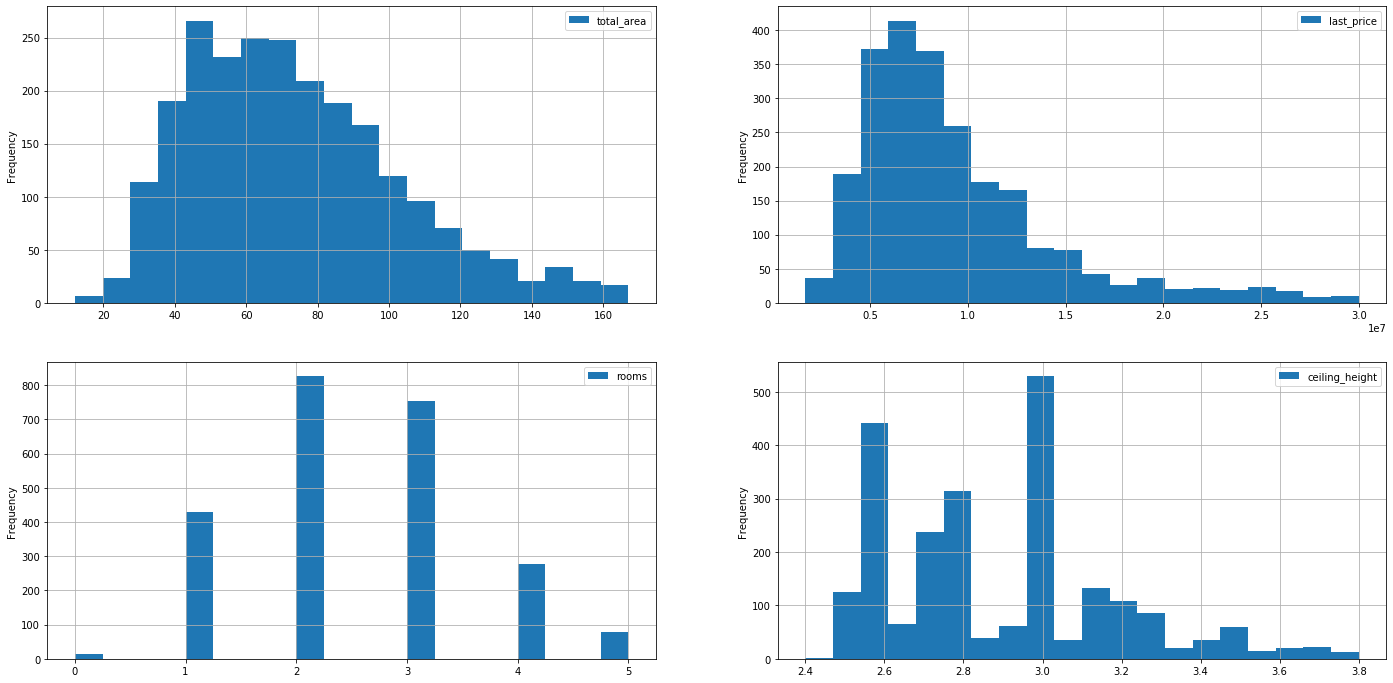

In [169]:
plt.figure(figsize=(24,12))
counter = 1

for col in data_flats_center_important.columns:
    
    left = data_flats_center_important[col].quantile(0)
    right = data_flats_center_important[col].quantile(0.99)
    
    plt.subplot(2,2,counter)
    data_flats_center_important[col].plot(kind='hist', bins=20, range=(left, right), label=col)
    counter += 1
    plt.grid()
    plt.legend()

По гистограммам видно, что все величины, кроме высоты потолков распределены нормально. Их этого можно сделать вывод, что площадь, цена и количество комнат в квартире практически не зависят от расстояния до центра. При этом высота потолков зависит очень сильно - можно выделить три группы типовых квартир в центре:
1. потолки 2.5
2. потолки 2.75
3. потолки 3.0

Чтобы выделить факторы, значительно влияющие на стоимость квартиры в центральном сегменте, снова в цикле посчитаем все коэффициенты корреляции

In [170]:
# удаляем столбцы, которые мы создали в процессе обработки

try:
    data_flats_center.drop(['cityCenters_nearest_km', 'floor_group_id'], axis = 1, inplace = True)
except:
    pass

In [171]:
# считаем коэффициенты корреляции столбца 'last_price' со всеми остальными

col_corr = correlation_list (data_flats_center, 'last_price', return_corr_dict = True)

Корреляция между столбцами last_price и total_images = 0.15969599700833387

Корреляция между столбцами last_price и last_price = 1.0

Корреляция между столбцами last_price и total_area = 0.7384969689742563

Столбцы last_price и first_day_exposition - несовпадение типов

Корреляция между столбцами last_price и rooms = 0.4242818858603392

Корреляция между столбцами last_price и ceiling_height = 0.1772557431938474

Корреляция между столбцами last_price и floors_total = 0.1319807334569006

Корреляция между столбцами last_price и living_area = 0.5915908375888734

Корреляция между столбцами last_price и floor = 0.17231200476534295

Корреляция между столбцами last_price и is_apartment = 0.028218824666500865

Корреляция между столбцами last_price и studio = -0.06934727920173545

Корреляция между столбцами last_price и open_plan = -0.03779767706423212

Корреляция между столбцами last_price и kitchen_area = 0.5294994168810881

Корреляция между столбцами last_price и balcony = 0.1270551356385866


И снова, т.к. коэффициент корреляции - достаточное, но не необходимое условие существование зависимости, построим графики.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


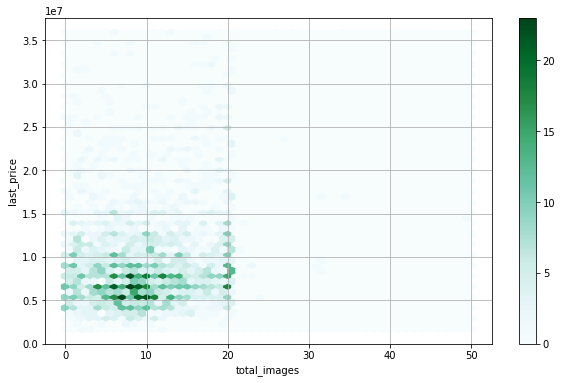

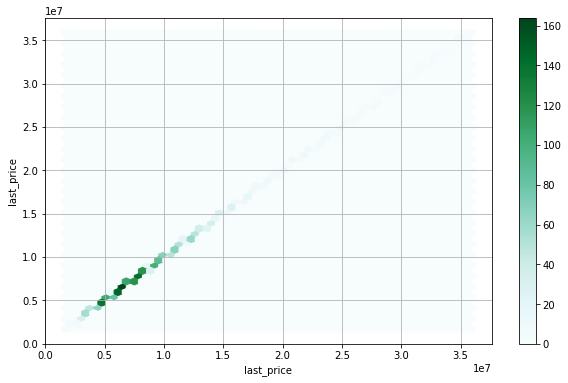

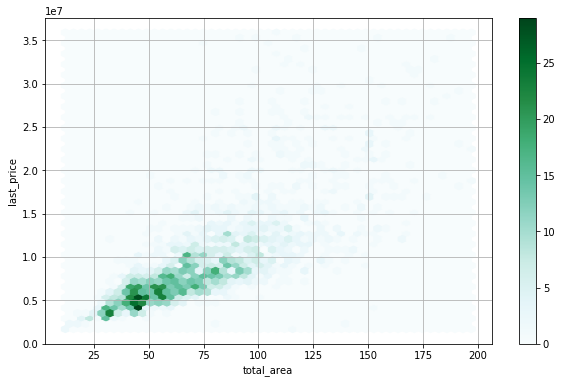

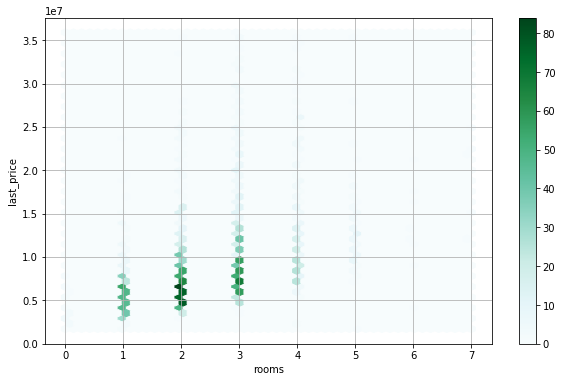

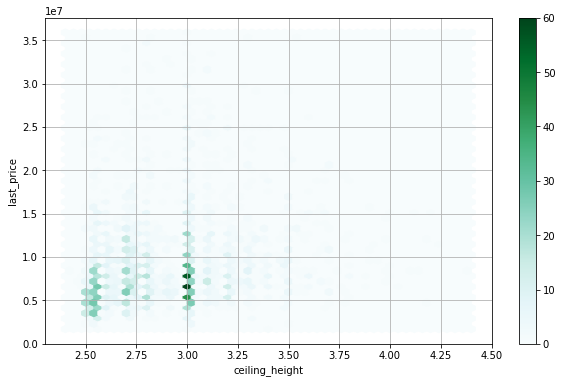

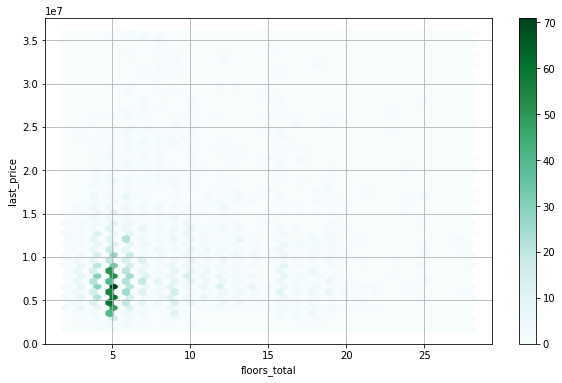

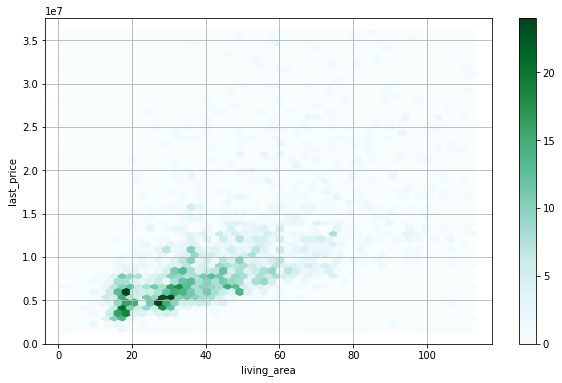

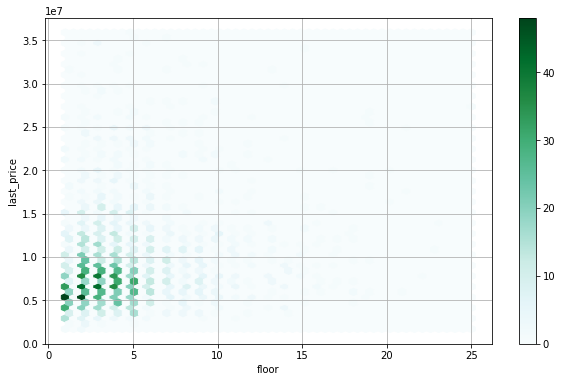

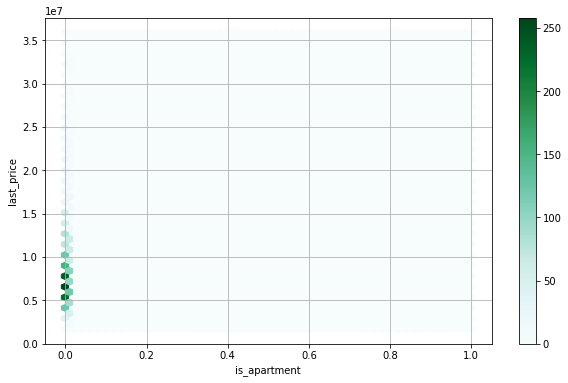

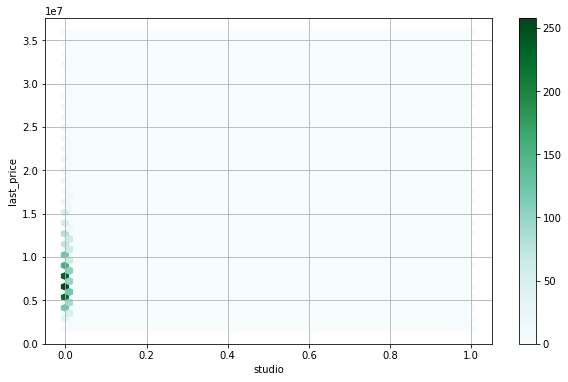

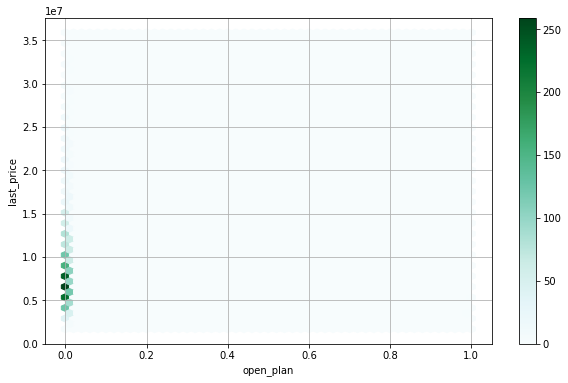

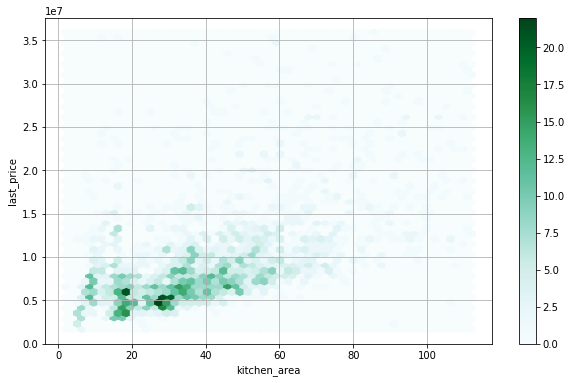

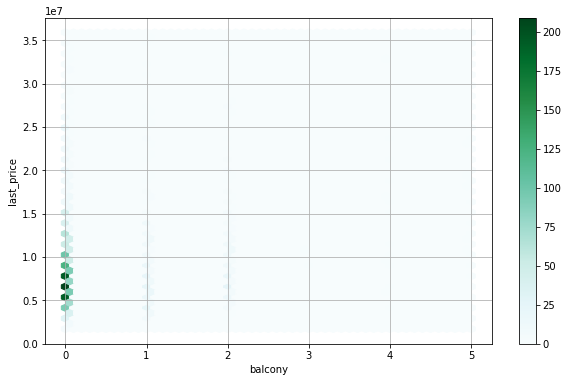

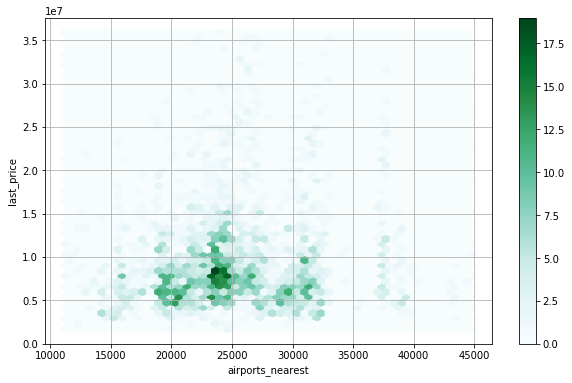

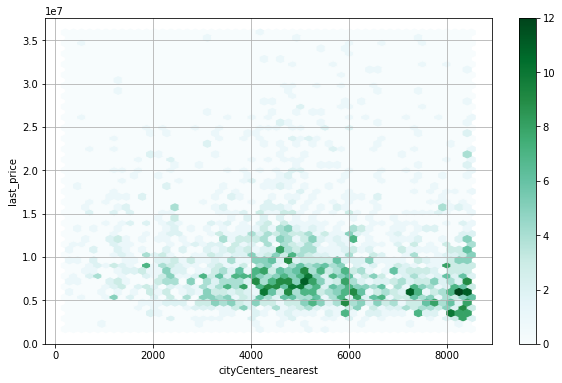

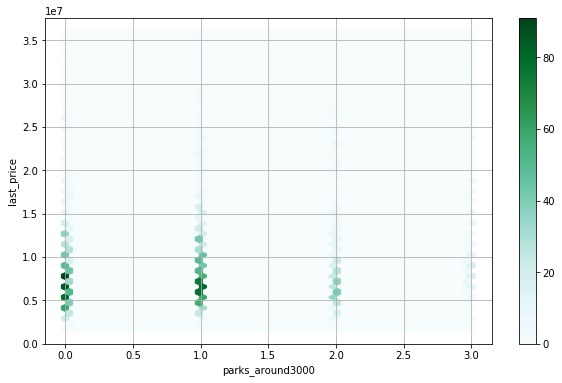

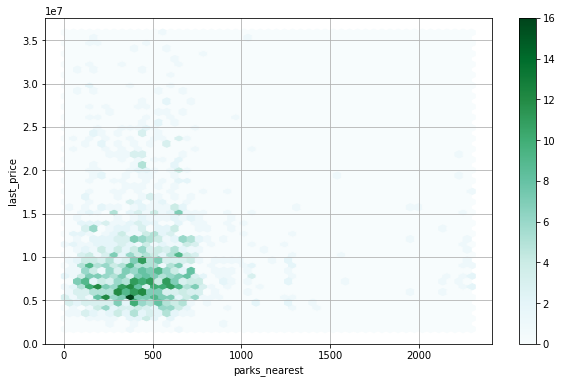

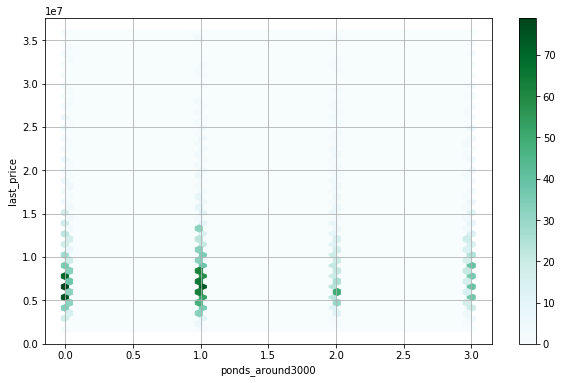

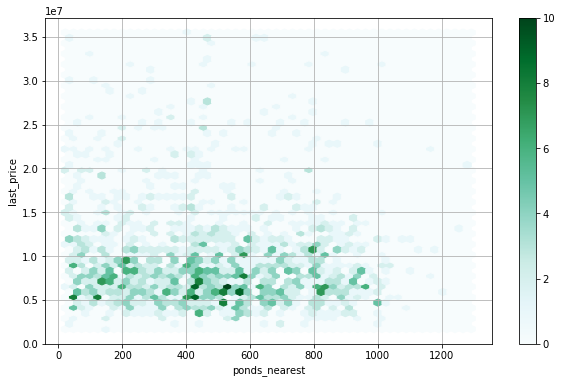

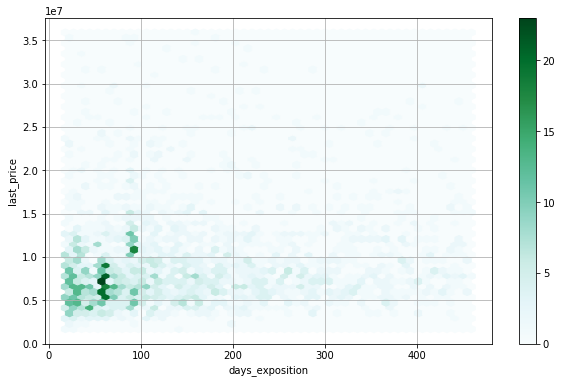

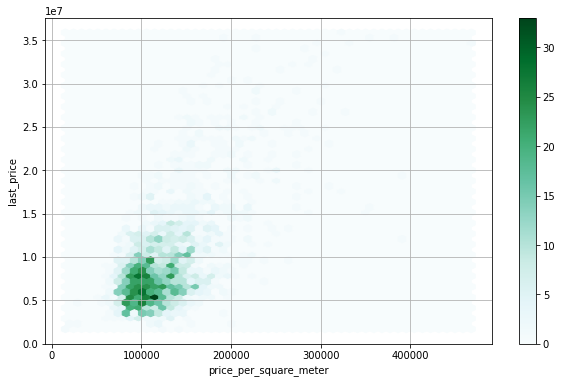

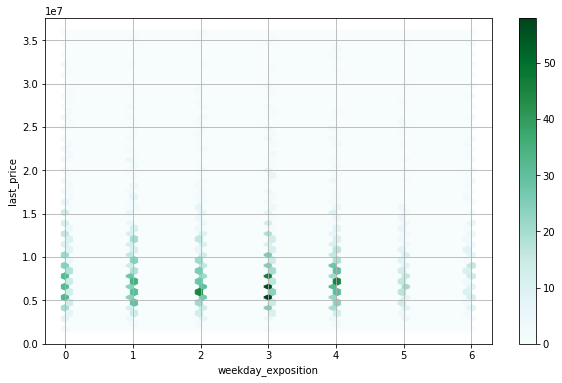

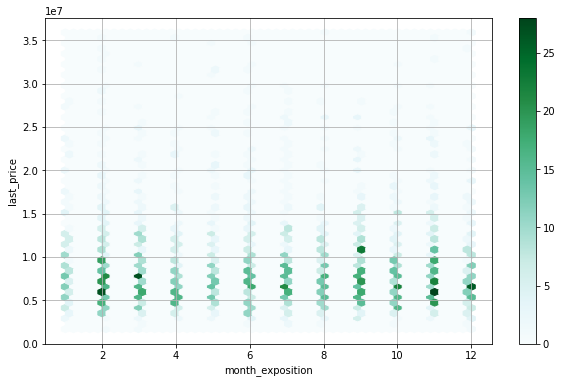

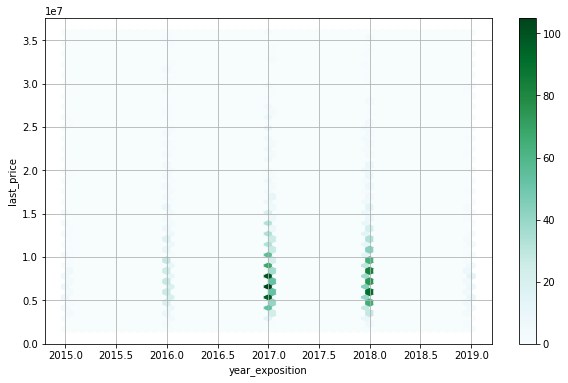

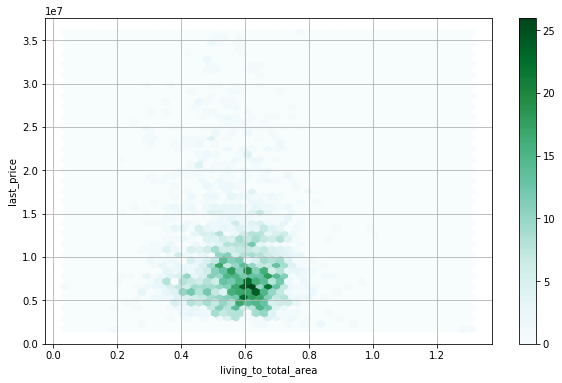

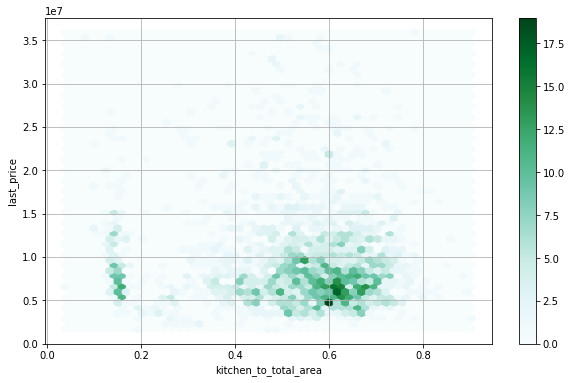

In [172]:
for col in corr_df.index.values:
    
    try:
        data_flats_center.plot(x=col, y='last_price', kind='hexbin', figsize=(10,6), gridsize=50, sharex=False, grid=True)
    except:
        print('Колонка {} имеет нечисленный тип'.format(col))

В дополнение к тому, что мы уже выяснили, посчитав коэффициенты корреляции, из этих графиков можно сказать:
   1. В центре дома продаются в основном в пятиэтажках
   2. Цена за квадратный метр в центре примерно одинаковая
   3. Большая часть квартир находится на расстоянии около 500 метров до ближайшего парка

In [173]:
# вспомним, что коэффициенты корреляции, рассчитанные для всей таблицы мы сохранили в датафрейме corr_df
# добавим в него коэффициенты корреляции в центральном сегменте
# но сначала удалим корреляцию для столбца cityCenters_nearest_km, потому что на тот момент его еще не существовало

try:
    del col_corr['cityCenters_nearest_km']
    del col_corr['floor_group_id']
    
except KeyError:
    print('Столбец удален')

corr_df['center'] = col_corr.values()

Столбец удален


In [174]:
# таблица для коэффициентов корреляции столбца last_price со всеми остальными, рассчитанных для всех данных и только для центра

corr_df

,whole,center
total_images,0.160597,0.159696
last_price,1.000000,1.000000
total_area,0.771069,0.738497
rooms,0.471323,0.424282
ceiling_height,0.394045,0.177256
floors_total,0.097606,0.131981
living_area,0.642755,0.591591
floor,0.090530,0.172312
is_apartment,0.020447,0.028219
studio,-0.055134,-0.069347


Text(0.5, 1.0, 'Сравненение коэффициентов коррелляции столбца "last_price" с остальными \n во всех данных и только в центральном сегменте')

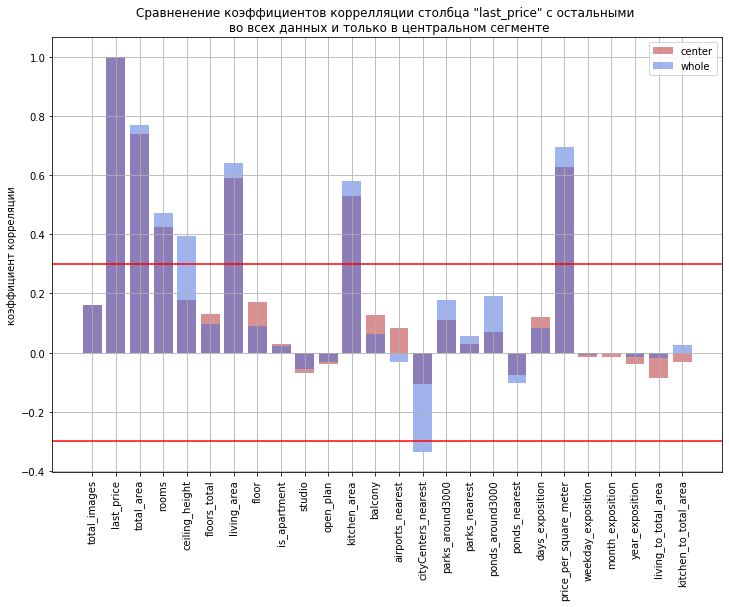

In [175]:
plt.figure(figsize=(12,8))

plt.bar(corr_df.index, corr_df['center'], color='firebrick', alpha=0.5, label='center')
plt.bar(corr_df.index, corr_df['whole'], color='royalblue', alpha=0.5, label='whole')

plt.xticks(rotation=90)
plt.ylabel('коэффициент корреляции')
plt.grid()
plt.legend()

plt.axhline(0.3, color='red')
plt.axhline(-0.3, color='red')

plt.title('Сравненение коэффициентов коррелляции столбца "last_price" с остальными \n во всех данных и только в центральном сегменте')

По сводной столбчатой диаграмме видно, что влияние общей площади и количества комнат на цену квартиры в центре немного снизилось. При этом значительно снизилось влияние высоты потолков (возможно, наше предположение о том, что высота потолков в центре в основном типовая, оказалось верным).

Значительно снизилось влияние расстояния до центра (чего следовало ожидать, ведь все квартиры и так в центральном сегменте)

### Промежуточный вывод 4

1. Были изучены столбцы, содержащие общую, жилую и кухонную площади. В результате можно отметить следующее:
    - Общая площадь распределена нормально

    - У жилой площади наблюдаем два четко выраженных пика. Скорее всего это связано с тем, что для некоторых квартир под жилой подразуемевалась не только площадь всех комнат, но и, например площадь балкона/санузла. Или для некоторых квартир, кухня считалась комнатой. Тем не менее, огибающая двух пиков стремится к огибающей нормального распределения. Другие предположения требуют явного указания как именно заполнялся этот столбец - пользователем или автоматически

    - Распределение кухонных площадей представляет собой практически набор отдельных пиков, которые в свою очередь распределены практически норммально. Вероятно, это связано с тем, что кухни обычно делают типовыми, поэтому мы и наблюдаем распредление дискретных пиков. Фактически можно попробовать аппроксимировать это распределение несколькими гауссами/лоренцами
    
    - выдвинутые предположения подтвреждаются коэффициентами корреляции между этими столбцами
 
 
2. Был изучен столбец с временем продажи квартиры, в результате были определены границы "нормального" времени продажи квартиры - от 17 до 460 дней


3. Были также изучены столбцы, содержащие цену, число комнат, высоту потолков квартир. В результате были выделены редкие и аномальные значения, которые были убраны из таблицы.


4. Были определены 10 населенных пунктов с максимальным количеством объявлений о продаже квартиры. Среди них были выделены лидеры по средней стоимости жилья и средней цене квадратного метра. В обеих категорях лидируют 3 города:

    - Санкт-Петербург
    - Пушкин
    - деревня Кудрово
    
    
5. Была определена граница центрального сегмента в Санкт-Петербурге. Радиус центральной зоны был принят равным 9.0 км

6. Были определены факторы, оказывающие наибольшее влияние на цену квартиры как для всех данных, так и только для центрального сегмента Санкт-Петербурга. Наибольшее влияние оказывают:

    - Общая площадь

    - Количество комнат

    - Высота потолков (не относится к центральному сегменту)

    - Близость к центру (не относится к центральному сегменту)
    
    При этом стоит отметить, что этаж (первый/последний) влияет на цену оцень слабо, а день недели/месяц/год публикации не влияют практически совсем

## Шаг 5. Общий вывод

1. Проведена предобработка данных. Где возможно пропуски заполнены логичными значениями


2. Выдвинуты предположения о возможных причинах возникновения пропусков


3. Типы данных в столбцах изменены согласно логике характиристики, предствленной в столбце


4. Посчитаны и добавлены в таблицу цена квадратного метра, день недели/месяц/год публикации, отношение жилой/кухонной площади к общей


5. Проведена категоризация этажей квартир


6. Изучены параметры площадь, цена, число комнат, высота потолков. Для каждого из этих параметров построены гистограммы и приведены возможные причины, обуславливающие форму гистограмм


7. Выделены границы "нормального" времени продажи квартиры - от 17 до 460 дней


8. Убраны редкие и аномальные значения из таблицы


9. Определены факторы, оказывающие наибольшее влияние на стоимость квартиры
    - Общая площадь

    - Количество комнат

    - Высота потолков 

    - Близость к центру (не относится к центральному сегменту)


10. Определены 10 населенных пунктов с наибольшим числом объявлений. Среди них выделены лидеры по средней стоимости жилья и цене квадратного метра


11. Определен радиус центральной зоны Санкт-Петербурга - 9 км


12. Для центральной зоны Санкт-Петербурга определены факторы, оказывающие наибольшее влияние на стоимость квартиры:

    - Общая площадь

    - Количество комнат

    - Высота потолков 
    
13. Продемонстрировано как изменилось влияние различных факторов на стоимость квартиры при оценке для всех данных и при переходе только к данным центрального сегмента


14. Показано отсутствие значительного влияния этажа на стоимость квартиры. И практически полное отсутствие вляния дня недели/месяца/года публикации
